# COGS109 - Group Project : Predicting IMDB Ratings

In [64]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

In [65]:
df = pd.read_csv('data/movies_ratings.csv')
df = df.drop(columns=['Unnamed: 0','vote_average','vote_count'])

In [66]:
df

,rating_avg,belongs_to_collection,budget,Drama,Crime,Thriller,War,History,Animation,Fantasy,...,zu_lan,num_languages,Canceled,In Production,Planned,Post Production,Released,Rumored,tagline_len,video_int
0,4.333333,0,5.985000e+03,0,0,0,0,0,0,1,...,0.0,2,0.0,0.0,0.0,0.0,1.0,0.0,28,0
1,3.000000,0,1.000000e+05,1,0,0,1,1,0,0,...,0.0,1,0.0,0.0,0.0,0.0,1.0,0.0,36,0
2,3.500000,0,2.000000e+05,1,0,0,0,0,0,0,...,0.0,1,0.0,0.0,0.0,0.0,1.0,0.0,41,0
3,4.250000,0,2.160662e+07,1,0,0,0,0,0,0,...,0.0,2,0.0,0.0,0.0,0.0,1.0,0.0,31,0
4,4.250000,0,2.160662e+07,0,0,0,0,0,0,0,...,0.0,1,0.0,0.0,0.0,0.0,1.0,0.0,35,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8671,5.000000,0,1.000000e+06,0,0,1,0,0,0,0,...,0.0,1,0.0,0.0,0.0,0.0,1.0,0.0,79,0
8672,5.000000,0,2.160662e+07,0,0,0,0,0,1,0,...,0.0,1,0.0,0.0,0.0,0.0,1.0,0.0,0,0
8673,3.000000,1,2.160662e+07,1,0,0,0,0,1,1,...,0.0,1,0.0,0.0,0.0,0.0,1.0,0.0,29,0
8674,4.000000,0,2.160662e+07,0,0,0,0,0,1,0,...,0.0,1,0.0,0.0,0.0,0.0,1.0,0.0,0,0


In [196]:
X = df.iloc[:,1:]
y = df['rating_avg']
cols = X.columns.to_list()
RSS, features = [], []

remain_col = cols.copy()

for k in range(X.shape[1]):
    
    best_RSS = np.inf
   
    for col in remain_col:
  
        mdl = sm.OLS(y, X[features + [col]]).fit() 
        rss = mean_squared_error(y, mdl.predict()) * len(X)
        
        if rss < best_RSS:
            best_RSS = rss
            best_feature = col 

    features.append(best_feature)
    features
    RSS.append(best_RSS)
    
    ## add best k-feature model to dataframe   
    print(features)
    remain_col.remove(best_feature)
    

['release_date_int']
['release_date_int', 'Drama']
['release_date_int', 'Drama', 'United States of America']
['release_date_int', 'Drama', 'United States of America', 'Documentary']
['release_date_int', 'Drama', 'United States of America', 'Documentary', 'Horror']
['release_date_int', 'Drama', 'United States of America', 'Documentary', 'Horror', 'Action']
['release_date_int', 'Drama', 'United States of America', 'Documentary', 'Horror', 'Action', 'runtime']
['release_date_int', 'Drama', 'United States of America', 'Documentary', 'Horror', 'Action', 'runtime', 'budget']
['release_date_int', 'Drama', 'United States of America', 'Documentary', 'Horror', 'Action', 'runtime', 'budget', 'revenue']
['release_date_int', 'Drama', 'United States of America', 'Documentary', 'Horror', 'Action', 'runtime', 'budget', 'revenue', 'Animation']
['release_date_int', 'Drama', 'United States of America', 'Documentary', 'Horror', 'Action', 'runtime', 'budget', 'revenue', 'Animation', 'Released']
['release_d

['release_date_int', 'Drama', 'United States of America', 'Documentary', 'Horror', 'Action', 'runtime', 'budget', 'revenue', 'Animation', 'Released', 'Comedy', 'xx_lan', 'Family', 'Rumored', 'Post Production', 'In Production', 'Pixar Animation Studios', 'is_english', 'United Kingdom', 'fa_lan', 'DC Comics', 'Switzerland', 'belongs_to_collection', 'Marvel Studios', 'Foreign', 'cs_lan', 'South Africa', 'af_lan', 'Twentieth Century Fox Film Corporation', 'History', 'Mystery', 'Hong Kong', 'Burkina Faso', 'Working Title Films']
['release_date_int', 'Drama', 'United States of America', 'Documentary', 'Horror', 'Action', 'runtime', 'budget', 'revenue', 'Animation', 'Released', 'Comedy', 'xx_lan', 'Family', 'Rumored', 'Post Production', 'In Production', 'Pixar Animation Studios', 'is_english', 'United Kingdom', 'fa_lan', 'DC Comics', 'Switzerland', 'belongs_to_collection', 'Marvel Studios', 'Foreign', 'cs_lan', 'South Africa', 'af_lan', 'Twentieth Century Fox Film Corporation', 'History', 'My

['release_date_int', 'Drama', 'United States of America', 'Documentary', 'Horror', 'Action', 'runtime', 'budget', 'revenue', 'Animation', 'Released', 'Comedy', 'xx_lan', 'Family', 'Rumored', 'Post Production', 'In Production', 'Pixar Animation Studios', 'is_english', 'United Kingdom', 'fa_lan', 'DC Comics', 'Switzerland', 'belongs_to_collection', 'Marvel Studios', 'Foreign', 'cs_lan', 'South Africa', 'af_lan', 'Twentieth Century Fox Film Corporation', 'History', 'Mystery', 'Hong Kong', 'Burkina Faso', 'Working Title Films', 'Australia', 'Hungary', 'Russia', 'TriStar Pictures', 'Bad Hat Harry Productions', 'Walt Disney Pictures', 'DreamWorks Animation', 'Thriller', 'Netherlands', 'Brazil', 'pt_lan', 'video_int', 'Italy', 'num_countries']
['release_date_int', 'Drama', 'United States of America', 'Documentary', 'Horror', 'Action', 'runtime', 'budget', 'revenue', 'Animation', 'Released', 'Comedy', 'xx_lan', 'Family', 'Rumored', 'Post Production', 'In Production', 'Pixar Animation Studios',

['release_date_int', 'Drama', 'United States of America', 'Documentary', 'Horror', 'Action', 'runtime', 'budget', 'revenue', 'Animation', 'Released', 'Comedy', 'xx_lan', 'Family', 'Rumored', 'Post Production', 'In Production', 'Pixar Animation Studios', 'is_english', 'United Kingdom', 'fa_lan', 'DC Comics', 'Switzerland', 'belongs_to_collection', 'Marvel Studios', 'Foreign', 'cs_lan', 'South Africa', 'af_lan', 'Twentieth Century Fox Film Corporation', 'History', 'Mystery', 'Hong Kong', 'Burkina Faso', 'Working Title Films', 'Australia', 'Hungary', 'Russia', 'TriStar Pictures', 'Bad Hat Harry Productions', 'Walt Disney Pictures', 'DreamWorks Animation', 'Thriller', 'Netherlands', 'Brazil', 'pt_lan', 'video_int', 'Italy', 'num_countries', 'France', 'qu_lan', 'sl_lan', 'Romania', 'la_lan', 'cy_lan', 'Music', 'Scott Rudin Productions', 'Germany', 'Heyday Films', 'Ecuador']
['release_date_int', 'Drama', 'United States of America', 'Documentary', 'Horror', 'Action', 'runtime', 'budget', 'rev

['release_date_int', 'Drama', 'United States of America', 'Documentary', 'Horror', 'Action', 'runtime', 'budget', 'revenue', 'Animation', 'Released', 'Comedy', 'xx_lan', 'Family', 'Rumored', 'Post Production', 'In Production', 'Pixar Animation Studios', 'is_english', 'United Kingdom', 'fa_lan', 'DC Comics', 'Switzerland', 'belongs_to_collection', 'Marvel Studios', 'Foreign', 'cs_lan', 'South Africa', 'af_lan', 'Twentieth Century Fox Film Corporation', 'History', 'Mystery', 'Hong Kong', 'Burkina Faso', 'Working Title Films', 'Australia', 'Hungary', 'Russia', 'TriStar Pictures', 'Bad Hat Harry Productions', 'Walt Disney Pictures', 'DreamWorks Animation', 'Thriller', 'Netherlands', 'Brazil', 'pt_lan', 'video_int', 'Italy', 'num_countries', 'France', 'qu_lan', 'sl_lan', 'Romania', 'la_lan', 'cy_lan', 'Music', 'Scott Rudin Productions', 'Germany', 'Heyday Films', 'Ecuador', 'Bulgaria', 'tagline_len', 'Turkey', 'Iran', 'th_lan', 'Ukraine', 'Norway', 'no_lan', 'Silver Pictures']
['release_dat

['release_date_int', 'Drama', 'United States of America', 'Documentary', 'Horror', 'Action', 'runtime', 'budget', 'revenue', 'Animation', 'Released', 'Comedy', 'xx_lan', 'Family', 'Rumored', 'Post Production', 'In Production', 'Pixar Animation Studios', 'is_english', 'United Kingdom', 'fa_lan', 'DC Comics', 'Switzerland', 'belongs_to_collection', 'Marvel Studios', 'Foreign', 'cs_lan', 'South Africa', 'af_lan', 'Twentieth Century Fox Film Corporation', 'History', 'Mystery', 'Hong Kong', 'Burkina Faso', 'Working Title Films', 'Australia', 'Hungary', 'Russia', 'TriStar Pictures', 'Bad Hat Harry Productions', 'Walt Disney Pictures', 'DreamWorks Animation', 'Thriller', 'Netherlands', 'Brazil', 'pt_lan', 'video_int', 'Italy', 'num_countries', 'France', 'qu_lan', 'sl_lan', 'Romania', 'la_lan', 'cy_lan', 'Music', 'Scott Rudin Productions', 'Germany', 'Heyday Films', 'Ecuador', 'Bulgaria', 'tagline_len', 'Turkey', 'Iran', 'th_lan', 'Ukraine', 'Norway', 'no_lan', 'Silver Pictures', 'so_lan', 'Ic

['release_date_int', 'Drama', 'United States of America', 'Documentary', 'Horror', 'Action', 'runtime', 'budget', 'revenue', 'Animation', 'Released', 'Comedy', 'xx_lan', 'Family', 'Rumored', 'Post Production', 'In Production', 'Pixar Animation Studios', 'is_english', 'United Kingdom', 'fa_lan', 'DC Comics', 'Switzerland', 'belongs_to_collection', 'Marvel Studios', 'Foreign', 'cs_lan', 'South Africa', 'af_lan', 'Twentieth Century Fox Film Corporation', 'History', 'Mystery', 'Hong Kong', 'Burkina Faso', 'Working Title Films', 'Australia', 'Hungary', 'Russia', 'TriStar Pictures', 'Bad Hat Harry Productions', 'Walt Disney Pictures', 'DreamWorks Animation', 'Thriller', 'Netherlands', 'Brazil', 'pt_lan', 'video_int', 'Italy', 'num_countries', 'France', 'qu_lan', 'sl_lan', 'Romania', 'la_lan', 'cy_lan', 'Music', 'Scott Rudin Productions', 'Germany', 'Heyday Films', 'Ecuador', 'Bulgaria', 'tagline_len', 'Turkey', 'Iran', 'th_lan', 'Ukraine', 'Norway', 'no_lan', 'Silver Pictures', 'so_lan', 'Ic

['release_date_int', 'Drama', 'United States of America', 'Documentary', 'Horror', 'Action', 'runtime', 'budget', 'revenue', 'Animation', 'Released', 'Comedy', 'xx_lan', 'Family', 'Rumored', 'Post Production', 'In Production', 'Pixar Animation Studios', 'is_english', 'United Kingdom', 'fa_lan', 'DC Comics', 'Switzerland', 'belongs_to_collection', 'Marvel Studios', 'Foreign', 'cs_lan', 'South Africa', 'af_lan', 'Twentieth Century Fox Film Corporation', 'History', 'Mystery', 'Hong Kong', 'Burkina Faso', 'Working Title Films', 'Australia', 'Hungary', 'Russia', 'TriStar Pictures', 'Bad Hat Harry Productions', 'Walt Disney Pictures', 'DreamWorks Animation', 'Thriller', 'Netherlands', 'Brazil', 'pt_lan', 'video_int', 'Italy', 'num_countries', 'France', 'qu_lan', 'sl_lan', 'Romania', 'la_lan', 'cy_lan', 'Music', 'Scott Rudin Productions', 'Germany', 'Heyday Films', 'Ecuador', 'Bulgaria', 'tagline_len', 'Turkey', 'Iran', 'th_lan', 'Ukraine', 'Norway', 'no_lan', 'Silver Pictures', 'so_lan', 'Ic

['release_date_int', 'Drama', 'United States of America', 'Documentary', 'Horror', 'Action', 'runtime', 'budget', 'revenue', 'Animation', 'Released', 'Comedy', 'xx_lan', 'Family', 'Rumored', 'Post Production', 'In Production', 'Pixar Animation Studios', 'is_english', 'United Kingdom', 'fa_lan', 'DC Comics', 'Switzerland', 'belongs_to_collection', 'Marvel Studios', 'Foreign', 'cs_lan', 'South Africa', 'af_lan', 'Twentieth Century Fox Film Corporation', 'History', 'Mystery', 'Hong Kong', 'Burkina Faso', 'Working Title Films', 'Australia', 'Hungary', 'Russia', 'TriStar Pictures', 'Bad Hat Harry Productions', 'Walt Disney Pictures', 'DreamWorks Animation', 'Thriller', 'Netherlands', 'Brazil', 'pt_lan', 'video_int', 'Italy', 'num_countries', 'France', 'qu_lan', 'sl_lan', 'Romania', 'la_lan', 'cy_lan', 'Music', 'Scott Rudin Productions', 'Germany', 'Heyday Films', 'Ecuador', 'Bulgaria', 'tagline_len', 'Turkey', 'Iran', 'th_lan', 'Ukraine', 'Norway', 'no_lan', 'Silver Pictures', 'so_lan', 'Ic

['release_date_int', 'Drama', 'United States of America', 'Documentary', 'Horror', 'Action', 'runtime', 'budget', 'revenue', 'Animation', 'Released', 'Comedy', 'xx_lan', 'Family', 'Rumored', 'Post Production', 'In Production', 'Pixar Animation Studios', 'is_english', 'United Kingdom', 'fa_lan', 'DC Comics', 'Switzerland', 'belongs_to_collection', 'Marvel Studios', 'Foreign', 'cs_lan', 'South Africa', 'af_lan', 'Twentieth Century Fox Film Corporation', 'History', 'Mystery', 'Hong Kong', 'Burkina Faso', 'Working Title Films', 'Australia', 'Hungary', 'Russia', 'TriStar Pictures', 'Bad Hat Harry Productions', 'Walt Disney Pictures', 'DreamWorks Animation', 'Thriller', 'Netherlands', 'Brazil', 'pt_lan', 'video_int', 'Italy', 'num_countries', 'France', 'qu_lan', 'sl_lan', 'Romania', 'la_lan', 'cy_lan', 'Music', 'Scott Rudin Productions', 'Germany', 'Heyday Films', 'Ecuador', 'Bulgaria', 'tagline_len', 'Turkey', 'Iran', 'th_lan', 'Ukraine', 'Norway', 'no_lan', 'Silver Pictures', 'so_lan', 'Ic

['release_date_int', 'Drama', 'United States of America', 'Documentary', 'Horror', 'Action', 'runtime', 'budget', 'revenue', 'Animation', 'Released', 'Comedy', 'xx_lan', 'Family', 'Rumored', 'Post Production', 'In Production', 'Pixar Animation Studios', 'is_english', 'United Kingdom', 'fa_lan', 'DC Comics', 'Switzerland', 'belongs_to_collection', 'Marvel Studios', 'Foreign', 'cs_lan', 'South Africa', 'af_lan', 'Twentieth Century Fox Film Corporation', 'History', 'Mystery', 'Hong Kong', 'Burkina Faso', 'Working Title Films', 'Australia', 'Hungary', 'Russia', 'TriStar Pictures', 'Bad Hat Harry Productions', 'Walt Disney Pictures', 'DreamWorks Animation', 'Thriller', 'Netherlands', 'Brazil', 'pt_lan', 'video_int', 'Italy', 'num_countries', 'France', 'qu_lan', 'sl_lan', 'Romania', 'la_lan', 'cy_lan', 'Music', 'Scott Rudin Productions', 'Germany', 'Heyday Films', 'Ecuador', 'Bulgaria', 'tagline_len', 'Turkey', 'Iran', 'th_lan', 'Ukraine', 'Norway', 'no_lan', 'Silver Pictures', 'so_lan', 'Ic

['release_date_int', 'Drama', 'United States of America', 'Documentary', 'Horror', 'Action', 'runtime', 'budget', 'revenue', 'Animation', 'Released', 'Comedy', 'xx_lan', 'Family', 'Rumored', 'Post Production', 'In Production', 'Pixar Animation Studios', 'is_english', 'United Kingdom', 'fa_lan', 'DC Comics', 'Switzerland', 'belongs_to_collection', 'Marvel Studios', 'Foreign', 'cs_lan', 'South Africa', 'af_lan', 'Twentieth Century Fox Film Corporation', 'History', 'Mystery', 'Hong Kong', 'Burkina Faso', 'Working Title Films', 'Australia', 'Hungary', 'Russia', 'TriStar Pictures', 'Bad Hat Harry Productions', 'Walt Disney Pictures', 'DreamWorks Animation', 'Thriller', 'Netherlands', 'Brazil', 'pt_lan', 'video_int', 'Italy', 'num_countries', 'France', 'qu_lan', 'sl_lan', 'Romania', 'la_lan', 'cy_lan', 'Music', 'Scott Rudin Productions', 'Germany', 'Heyday Films', 'Ecuador', 'Bulgaria', 'tagline_len', 'Turkey', 'Iran', 'th_lan', 'Ukraine', 'Norway', 'no_lan', 'Silver Pictures', 'so_lan', 'Ic

['release_date_int', 'Drama', 'United States of America', 'Documentary', 'Horror', 'Action', 'runtime', 'budget', 'revenue', 'Animation', 'Released', 'Comedy', 'xx_lan', 'Family', 'Rumored', 'Post Production', 'In Production', 'Pixar Animation Studios', 'is_english', 'United Kingdom', 'fa_lan', 'DC Comics', 'Switzerland', 'belongs_to_collection', 'Marvel Studios', 'Foreign', 'cs_lan', 'South Africa', 'af_lan', 'Twentieth Century Fox Film Corporation', 'History', 'Mystery', 'Hong Kong', 'Burkina Faso', 'Working Title Films', 'Australia', 'Hungary', 'Russia', 'TriStar Pictures', 'Bad Hat Harry Productions', 'Walt Disney Pictures', 'DreamWorks Animation', 'Thriller', 'Netherlands', 'Brazil', 'pt_lan', 'video_int', 'Italy', 'num_countries', 'France', 'qu_lan', 'sl_lan', 'Romania', 'la_lan', 'cy_lan', 'Music', 'Scott Rudin Productions', 'Germany', 'Heyday Films', 'Ecuador', 'Bulgaria', 'tagline_len', 'Turkey', 'Iran', 'th_lan', 'Ukraine', 'Norway', 'no_lan', 'Silver Pictures', 'so_lan', 'Ic

['release_date_int', 'Drama', 'United States of America', 'Documentary', 'Horror', 'Action', 'runtime', 'budget', 'revenue', 'Animation', 'Released', 'Comedy', 'xx_lan', 'Family', 'Rumored', 'Post Production', 'In Production', 'Pixar Animation Studios', 'is_english', 'United Kingdom', 'fa_lan', 'DC Comics', 'Switzerland', 'belongs_to_collection', 'Marvel Studios', 'Foreign', 'cs_lan', 'South Africa', 'af_lan', 'Twentieth Century Fox Film Corporation', 'History', 'Mystery', 'Hong Kong', 'Burkina Faso', 'Working Title Films', 'Australia', 'Hungary', 'Russia', 'TriStar Pictures', 'Bad Hat Harry Productions', 'Walt Disney Pictures', 'DreamWorks Animation', 'Thriller', 'Netherlands', 'Brazil', 'pt_lan', 'video_int', 'Italy', 'num_countries', 'France', 'qu_lan', 'sl_lan', 'Romania', 'la_lan', 'cy_lan', 'Music', 'Scott Rudin Productions', 'Germany', 'Heyday Films', 'Ecuador', 'Bulgaria', 'tagline_len', 'Turkey', 'Iran', 'th_lan', 'Ukraine', 'Norway', 'no_lan', 'Silver Pictures', 'so_lan', 'Ic

['release_date_int', 'Drama', 'United States of America', 'Documentary', 'Horror', 'Action', 'runtime', 'budget', 'revenue', 'Animation', 'Released', 'Comedy', 'xx_lan', 'Family', 'Rumored', 'Post Production', 'In Production', 'Pixar Animation Studios', 'is_english', 'United Kingdom', 'fa_lan', 'DC Comics', 'Switzerland', 'belongs_to_collection', 'Marvel Studios', 'Foreign', 'cs_lan', 'South Africa', 'af_lan', 'Twentieth Century Fox Film Corporation', 'History', 'Mystery', 'Hong Kong', 'Burkina Faso', 'Working Title Films', 'Australia', 'Hungary', 'Russia', 'TriStar Pictures', 'Bad Hat Harry Productions', 'Walt Disney Pictures', 'DreamWorks Animation', 'Thriller', 'Netherlands', 'Brazil', 'pt_lan', 'video_int', 'Italy', 'num_countries', 'France', 'qu_lan', 'sl_lan', 'Romania', 'la_lan', 'cy_lan', 'Music', 'Scott Rudin Productions', 'Germany', 'Heyday Films', 'Ecuador', 'Bulgaria', 'tagline_len', 'Turkey', 'Iran', 'th_lan', 'Ukraine', 'Norway', 'no_lan', 'Silver Pictures', 'so_lan', 'Ic

['release_date_int', 'Drama', 'United States of America', 'Documentary', 'Horror', 'Action', 'runtime', 'budget', 'revenue', 'Animation', 'Released', 'Comedy', 'xx_lan', 'Family', 'Rumored', 'Post Production', 'In Production', 'Pixar Animation Studios', 'is_english', 'United Kingdom', 'fa_lan', 'DC Comics', 'Switzerland', 'belongs_to_collection', 'Marvel Studios', 'Foreign', 'cs_lan', 'South Africa', 'af_lan', 'Twentieth Century Fox Film Corporation', 'History', 'Mystery', 'Hong Kong', 'Burkina Faso', 'Working Title Films', 'Australia', 'Hungary', 'Russia', 'TriStar Pictures', 'Bad Hat Harry Productions', 'Walt Disney Pictures', 'DreamWorks Animation', 'Thriller', 'Netherlands', 'Brazil', 'pt_lan', 'video_int', 'Italy', 'num_countries', 'France', 'qu_lan', 'sl_lan', 'Romania', 'la_lan', 'cy_lan', 'Music', 'Scott Rudin Productions', 'Germany', 'Heyday Films', 'Ecuador', 'Bulgaria', 'tagline_len', 'Turkey', 'Iran', 'th_lan', 'Ukraine', 'Norway', 'no_lan', 'Silver Pictures', 'so_lan', 'Ic

['release_date_int', 'Drama', 'United States of America', 'Documentary', 'Horror', 'Action', 'runtime', 'budget', 'revenue', 'Animation', 'Released', 'Comedy', 'xx_lan', 'Family', 'Rumored', 'Post Production', 'In Production', 'Pixar Animation Studios', 'is_english', 'United Kingdom', 'fa_lan', 'DC Comics', 'Switzerland', 'belongs_to_collection', 'Marvel Studios', 'Foreign', 'cs_lan', 'South Africa', 'af_lan', 'Twentieth Century Fox Film Corporation', 'History', 'Mystery', 'Hong Kong', 'Burkina Faso', 'Working Title Films', 'Australia', 'Hungary', 'Russia', 'TriStar Pictures', 'Bad Hat Harry Productions', 'Walt Disney Pictures', 'DreamWorks Animation', 'Thriller', 'Netherlands', 'Brazil', 'pt_lan', 'video_int', 'Italy', 'num_countries', 'France', 'qu_lan', 'sl_lan', 'Romania', 'la_lan', 'cy_lan', 'Music', 'Scott Rudin Productions', 'Germany', 'Heyday Films', 'Ecuador', 'Bulgaria', 'tagline_len', 'Turkey', 'Iran', 'th_lan', 'Ukraine', 'Norway', 'no_lan', 'Silver Pictures', 'so_lan', 'Ic

['release_date_int', 'Drama', 'United States of America', 'Documentary', 'Horror', 'Action', 'runtime', 'budget', 'revenue', 'Animation', 'Released', 'Comedy', 'xx_lan', 'Family', 'Rumored', 'Post Production', 'In Production', 'Pixar Animation Studios', 'is_english', 'United Kingdom', 'fa_lan', 'DC Comics', 'Switzerland', 'belongs_to_collection', 'Marvel Studios', 'Foreign', 'cs_lan', 'South Africa', 'af_lan', 'Twentieth Century Fox Film Corporation', 'History', 'Mystery', 'Hong Kong', 'Burkina Faso', 'Working Title Films', 'Australia', 'Hungary', 'Russia', 'TriStar Pictures', 'Bad Hat Harry Productions', 'Walt Disney Pictures', 'DreamWorks Animation', 'Thriller', 'Netherlands', 'Brazil', 'pt_lan', 'video_int', 'Italy', 'num_countries', 'France', 'qu_lan', 'sl_lan', 'Romania', 'la_lan', 'cy_lan', 'Music', 'Scott Rudin Productions', 'Germany', 'Heyday Films', 'Ecuador', 'Bulgaria', 'tagline_len', 'Turkey', 'Iran', 'th_lan', 'Ukraine', 'Norway', 'no_lan', 'Silver Pictures', 'so_lan', 'Ic

['release_date_int', 'Drama', 'United States of America', 'Documentary', 'Horror', 'Action', 'runtime', 'budget', 'revenue', 'Animation', 'Released', 'Comedy', 'xx_lan', 'Family', 'Rumored', 'Post Production', 'In Production', 'Pixar Animation Studios', 'is_english', 'United Kingdom', 'fa_lan', 'DC Comics', 'Switzerland', 'belongs_to_collection', 'Marvel Studios', 'Foreign', 'cs_lan', 'South Africa', 'af_lan', 'Twentieth Century Fox Film Corporation', 'History', 'Mystery', 'Hong Kong', 'Burkina Faso', 'Working Title Films', 'Australia', 'Hungary', 'Russia', 'TriStar Pictures', 'Bad Hat Harry Productions', 'Walt Disney Pictures', 'DreamWorks Animation', 'Thriller', 'Netherlands', 'Brazil', 'pt_lan', 'video_int', 'Italy', 'num_countries', 'France', 'qu_lan', 'sl_lan', 'Romania', 'la_lan', 'cy_lan', 'Music', 'Scott Rudin Productions', 'Germany', 'Heyday Films', 'Ecuador', 'Bulgaria', 'tagline_len', 'Turkey', 'Iran', 'th_lan', 'Ukraine', 'Norway', 'no_lan', 'Silver Pictures', 'so_lan', 'Ic

['release_date_int', 'Drama', 'United States of America', 'Documentary', 'Horror', 'Action', 'runtime', 'budget', 'revenue', 'Animation', 'Released', 'Comedy', 'xx_lan', 'Family', 'Rumored', 'Post Production', 'In Production', 'Pixar Animation Studios', 'is_english', 'United Kingdom', 'fa_lan', 'DC Comics', 'Switzerland', 'belongs_to_collection', 'Marvel Studios', 'Foreign', 'cs_lan', 'South Africa', 'af_lan', 'Twentieth Century Fox Film Corporation', 'History', 'Mystery', 'Hong Kong', 'Burkina Faso', 'Working Title Films', 'Australia', 'Hungary', 'Russia', 'TriStar Pictures', 'Bad Hat Harry Productions', 'Walt Disney Pictures', 'DreamWorks Animation', 'Thriller', 'Netherlands', 'Brazil', 'pt_lan', 'video_int', 'Italy', 'num_countries', 'France', 'qu_lan', 'sl_lan', 'Romania', 'la_lan', 'cy_lan', 'Music', 'Scott Rudin Productions', 'Germany', 'Heyday Films', 'Ecuador', 'Bulgaria', 'tagline_len', 'Turkey', 'Iran', 'th_lan', 'Ukraine', 'Norway', 'no_lan', 'Silver Pictures', 'so_lan', 'Ic

['release_date_int', 'Drama', 'United States of America', 'Documentary', 'Horror', 'Action', 'runtime', 'budget', 'revenue', 'Animation', 'Released', 'Comedy', 'xx_lan', 'Family', 'Rumored', 'Post Production', 'In Production', 'Pixar Animation Studios', 'is_english', 'United Kingdom', 'fa_lan', 'DC Comics', 'Switzerland', 'belongs_to_collection', 'Marvel Studios', 'Foreign', 'cs_lan', 'South Africa', 'af_lan', 'Twentieth Century Fox Film Corporation', 'History', 'Mystery', 'Hong Kong', 'Burkina Faso', 'Working Title Films', 'Australia', 'Hungary', 'Russia', 'TriStar Pictures', 'Bad Hat Harry Productions', 'Walt Disney Pictures', 'DreamWorks Animation', 'Thriller', 'Netherlands', 'Brazil', 'pt_lan', 'video_int', 'Italy', 'num_countries', 'France', 'qu_lan', 'sl_lan', 'Romania', 'la_lan', 'cy_lan', 'Music', 'Scott Rudin Productions', 'Germany', 'Heyday Films', 'Ecuador', 'Bulgaria', 'tagline_len', 'Turkey', 'Iran', 'th_lan', 'Ukraine', 'Norway', 'no_lan', 'Silver Pictures', 'so_lan', 'Ic

['release_date_int', 'Drama', 'United States of America', 'Documentary', 'Horror', 'Action', 'runtime', 'budget', 'revenue', 'Animation', 'Released', 'Comedy', 'xx_lan', 'Family', 'Rumored', 'Post Production', 'In Production', 'Pixar Animation Studios', 'is_english', 'United Kingdom', 'fa_lan', 'DC Comics', 'Switzerland', 'belongs_to_collection', 'Marvel Studios', 'Foreign', 'cs_lan', 'South Africa', 'af_lan', 'Twentieth Century Fox Film Corporation', 'History', 'Mystery', 'Hong Kong', 'Burkina Faso', 'Working Title Films', 'Australia', 'Hungary', 'Russia', 'TriStar Pictures', 'Bad Hat Harry Productions', 'Walt Disney Pictures', 'DreamWorks Animation', 'Thriller', 'Netherlands', 'Brazil', 'pt_lan', 'video_int', 'Italy', 'num_countries', 'France', 'qu_lan', 'sl_lan', 'Romania', 'la_lan', 'cy_lan', 'Music', 'Scott Rudin Productions', 'Germany', 'Heyday Films', 'Ecuador', 'Bulgaria', 'tagline_len', 'Turkey', 'Iran', 'th_lan', 'Ukraine', 'Norway', 'no_lan', 'Silver Pictures', 'so_lan', 'Ic

['release_date_int', 'Drama', 'United States of America', 'Documentary', 'Horror', 'Action', 'runtime', 'budget', 'revenue', 'Animation', 'Released', 'Comedy', 'xx_lan', 'Family', 'Rumored', 'Post Production', 'In Production', 'Pixar Animation Studios', 'is_english', 'United Kingdom', 'fa_lan', 'DC Comics', 'Switzerland', 'belongs_to_collection', 'Marvel Studios', 'Foreign', 'cs_lan', 'South Africa', 'af_lan', 'Twentieth Century Fox Film Corporation', 'History', 'Mystery', 'Hong Kong', 'Burkina Faso', 'Working Title Films', 'Australia', 'Hungary', 'Russia', 'TriStar Pictures', 'Bad Hat Harry Productions', 'Walt Disney Pictures', 'DreamWorks Animation', 'Thriller', 'Netherlands', 'Brazil', 'pt_lan', 'video_int', 'Italy', 'num_countries', 'France', 'qu_lan', 'sl_lan', 'Romania', 'la_lan', 'cy_lan', 'Music', 'Scott Rudin Productions', 'Germany', 'Heyday Films', 'Ecuador', 'Bulgaria', 'tagline_len', 'Turkey', 'Iran', 'th_lan', 'Ukraine', 'Norway', 'no_lan', 'Silver Pictures', 'so_lan', 'Ic

['release_date_int', 'Drama', 'United States of America', 'Documentary', 'Horror', 'Action', 'runtime', 'budget', 'revenue', 'Animation', 'Released', 'Comedy', 'xx_lan', 'Family', 'Rumored', 'Post Production', 'In Production', 'Pixar Animation Studios', 'is_english', 'United Kingdom', 'fa_lan', 'DC Comics', 'Switzerland', 'belongs_to_collection', 'Marvel Studios', 'Foreign', 'cs_lan', 'South Africa', 'af_lan', 'Twentieth Century Fox Film Corporation', 'History', 'Mystery', 'Hong Kong', 'Burkina Faso', 'Working Title Films', 'Australia', 'Hungary', 'Russia', 'TriStar Pictures', 'Bad Hat Harry Productions', 'Walt Disney Pictures', 'DreamWorks Animation', 'Thriller', 'Netherlands', 'Brazil', 'pt_lan', 'video_int', 'Italy', 'num_countries', 'France', 'qu_lan', 'sl_lan', 'Romania', 'la_lan', 'cy_lan', 'Music', 'Scott Rudin Productions', 'Germany', 'Heyday Films', 'Ecuador', 'Bulgaria', 'tagline_len', 'Turkey', 'Iran', 'th_lan', 'Ukraine', 'Norway', 'no_lan', 'Silver Pictures', 'so_lan', 'Ic

['release_date_int', 'Drama', 'United States of America', 'Documentary', 'Horror', 'Action', 'runtime', 'budget', 'revenue', 'Animation', 'Released', 'Comedy', 'xx_lan', 'Family', 'Rumored', 'Post Production', 'In Production', 'Pixar Animation Studios', 'is_english', 'United Kingdom', 'fa_lan', 'DC Comics', 'Switzerland', 'belongs_to_collection', 'Marvel Studios', 'Foreign', 'cs_lan', 'South Africa', 'af_lan', 'Twentieth Century Fox Film Corporation', 'History', 'Mystery', 'Hong Kong', 'Burkina Faso', 'Working Title Films', 'Australia', 'Hungary', 'Russia', 'TriStar Pictures', 'Bad Hat Harry Productions', 'Walt Disney Pictures', 'DreamWorks Animation', 'Thriller', 'Netherlands', 'Brazil', 'pt_lan', 'video_int', 'Italy', 'num_countries', 'France', 'qu_lan', 'sl_lan', 'Romania', 'la_lan', 'cy_lan', 'Music', 'Scott Rudin Productions', 'Germany', 'Heyday Films', 'Ecuador', 'Bulgaria', 'tagline_len', 'Turkey', 'Iran', 'th_lan', 'Ukraine', 'Norway', 'no_lan', 'Silver Pictures', 'so_lan', 'Ic

['release_date_int', 'Drama', 'United States of America', 'Documentary', 'Horror', 'Action', 'runtime', 'budget', 'revenue', 'Animation', 'Released', 'Comedy', 'xx_lan', 'Family', 'Rumored', 'Post Production', 'In Production', 'Pixar Animation Studios', 'is_english', 'United Kingdom', 'fa_lan', 'DC Comics', 'Switzerland', 'belongs_to_collection', 'Marvel Studios', 'Foreign', 'cs_lan', 'South Africa', 'af_lan', 'Twentieth Century Fox Film Corporation', 'History', 'Mystery', 'Hong Kong', 'Burkina Faso', 'Working Title Films', 'Australia', 'Hungary', 'Russia', 'TriStar Pictures', 'Bad Hat Harry Productions', 'Walt Disney Pictures', 'DreamWorks Animation', 'Thriller', 'Netherlands', 'Brazil', 'pt_lan', 'video_int', 'Italy', 'num_countries', 'France', 'qu_lan', 'sl_lan', 'Romania', 'la_lan', 'cy_lan', 'Music', 'Scott Rudin Productions', 'Germany', 'Heyday Films', 'Ecuador', 'Bulgaria', 'tagline_len', 'Turkey', 'Iran', 'th_lan', 'Ukraine', 'Norway', 'no_lan', 'Silver Pictures', 'so_lan', 'Ic

['release_date_int', 'Drama', 'United States of America', 'Documentary', 'Horror', 'Action', 'runtime', 'budget', 'revenue', 'Animation', 'Released', 'Comedy', 'xx_lan', 'Family', 'Rumored', 'Post Production', 'In Production', 'Pixar Animation Studios', 'is_english', 'United Kingdom', 'fa_lan', 'DC Comics', 'Switzerland', 'belongs_to_collection', 'Marvel Studios', 'Foreign', 'cs_lan', 'South Africa', 'af_lan', 'Twentieth Century Fox Film Corporation', 'History', 'Mystery', 'Hong Kong', 'Burkina Faso', 'Working Title Films', 'Australia', 'Hungary', 'Russia', 'TriStar Pictures', 'Bad Hat Harry Productions', 'Walt Disney Pictures', 'DreamWorks Animation', 'Thriller', 'Netherlands', 'Brazil', 'pt_lan', 'video_int', 'Italy', 'num_countries', 'France', 'qu_lan', 'sl_lan', 'Romania', 'la_lan', 'cy_lan', 'Music', 'Scott Rudin Productions', 'Germany', 'Heyday Films', 'Ecuador', 'Bulgaria', 'tagline_len', 'Turkey', 'Iran', 'th_lan', 'Ukraine', 'Norway', 'no_lan', 'Silver Pictures', 'so_lan', 'Ic

['release_date_int', 'Drama', 'United States of America', 'Documentary', 'Horror', 'Action', 'runtime', 'budget', 'revenue', 'Animation', 'Released', 'Comedy', 'xx_lan', 'Family', 'Rumored', 'Post Production', 'In Production', 'Pixar Animation Studios', 'is_english', 'United Kingdom', 'fa_lan', 'DC Comics', 'Switzerland', 'belongs_to_collection', 'Marvel Studios', 'Foreign', 'cs_lan', 'South Africa', 'af_lan', 'Twentieth Century Fox Film Corporation', 'History', 'Mystery', 'Hong Kong', 'Burkina Faso', 'Working Title Films', 'Australia', 'Hungary', 'Russia', 'TriStar Pictures', 'Bad Hat Harry Productions', 'Walt Disney Pictures', 'DreamWorks Animation', 'Thriller', 'Netherlands', 'Brazil', 'pt_lan', 'video_int', 'Italy', 'num_countries', 'France', 'qu_lan', 'sl_lan', 'Romania', 'la_lan', 'cy_lan', 'Music', 'Scott Rudin Productions', 'Germany', 'Heyday Films', 'Ecuador', 'Bulgaria', 'tagline_len', 'Turkey', 'Iran', 'th_lan', 'Ukraine', 'Norway', 'no_lan', 'Silver Pictures', 'so_lan', 'Ic

['release_date_int', 'Drama', 'United States of America', 'Documentary', 'Horror', 'Action', 'runtime', 'budget', 'revenue', 'Animation', 'Released', 'Comedy', 'xx_lan', 'Family', 'Rumored', 'Post Production', 'In Production', 'Pixar Animation Studios', 'is_english', 'United Kingdom', 'fa_lan', 'DC Comics', 'Switzerland', 'belongs_to_collection', 'Marvel Studios', 'Foreign', 'cs_lan', 'South Africa', 'af_lan', 'Twentieth Century Fox Film Corporation', 'History', 'Mystery', 'Hong Kong', 'Burkina Faso', 'Working Title Films', 'Australia', 'Hungary', 'Russia', 'TriStar Pictures', 'Bad Hat Harry Productions', 'Walt Disney Pictures', 'DreamWorks Animation', 'Thriller', 'Netherlands', 'Brazil', 'pt_lan', 'video_int', 'Italy', 'num_countries', 'France', 'qu_lan', 'sl_lan', 'Romania', 'la_lan', 'cy_lan', 'Music', 'Scott Rudin Productions', 'Germany', 'Heyday Films', 'Ecuador', 'Bulgaria', 'tagline_len', 'Turkey', 'Iran', 'th_lan', 'Ukraine', 'Norway', 'no_lan', 'Silver Pictures', 'so_lan', 'Ic

['release_date_int', 'Drama', 'United States of America', 'Documentary', 'Horror', 'Action', 'runtime', 'budget', 'revenue', 'Animation', 'Released', 'Comedy', 'xx_lan', 'Family', 'Rumored', 'Post Production', 'In Production', 'Pixar Animation Studios', 'is_english', 'United Kingdom', 'fa_lan', 'DC Comics', 'Switzerland', 'belongs_to_collection', 'Marvel Studios', 'Foreign', 'cs_lan', 'South Africa', 'af_lan', 'Twentieth Century Fox Film Corporation', 'History', 'Mystery', 'Hong Kong', 'Burkina Faso', 'Working Title Films', 'Australia', 'Hungary', 'Russia', 'TriStar Pictures', 'Bad Hat Harry Productions', 'Walt Disney Pictures', 'DreamWorks Animation', 'Thriller', 'Netherlands', 'Brazil', 'pt_lan', 'video_int', 'Italy', 'num_countries', 'France', 'qu_lan', 'sl_lan', 'Romania', 'la_lan', 'cy_lan', 'Music', 'Scott Rudin Productions', 'Germany', 'Heyday Films', 'Ecuador', 'Bulgaria', 'tagline_len', 'Turkey', 'Iran', 'th_lan', 'Ukraine', 'Norway', 'no_lan', 'Silver Pictures', 'so_lan', 'Ic

['release_date_int', 'Drama', 'United States of America', 'Documentary', 'Horror', 'Action', 'runtime', 'budget', 'revenue', 'Animation', 'Released', 'Comedy', 'xx_lan', 'Family', 'Rumored', 'Post Production', 'In Production', 'Pixar Animation Studios', 'is_english', 'United Kingdom', 'fa_lan', 'DC Comics', 'Switzerland', 'belongs_to_collection', 'Marvel Studios', 'Foreign', 'cs_lan', 'South Africa', 'af_lan', 'Twentieth Century Fox Film Corporation', 'History', 'Mystery', 'Hong Kong', 'Burkina Faso', 'Working Title Films', 'Australia', 'Hungary', 'Russia', 'TriStar Pictures', 'Bad Hat Harry Productions', 'Walt Disney Pictures', 'DreamWorks Animation', 'Thriller', 'Netherlands', 'Brazil', 'pt_lan', 'video_int', 'Italy', 'num_countries', 'France', 'qu_lan', 'sl_lan', 'Romania', 'la_lan', 'cy_lan', 'Music', 'Scott Rudin Productions', 'Germany', 'Heyday Films', 'Ecuador', 'Bulgaria', 'tagline_len', 'Turkey', 'Iran', 'th_lan', 'Ukraine', 'Norway', 'no_lan', 'Silver Pictures', 'so_lan', 'Ic

['release_date_int', 'Drama', 'United States of America', 'Documentary', 'Horror', 'Action', 'runtime', 'budget', 'revenue', 'Animation', 'Released', 'Comedy', 'xx_lan', 'Family', 'Rumored', 'Post Production', 'In Production', 'Pixar Animation Studios', 'is_english', 'United Kingdom', 'fa_lan', 'DC Comics', 'Switzerland', 'belongs_to_collection', 'Marvel Studios', 'Foreign', 'cs_lan', 'South Africa', 'af_lan', 'Twentieth Century Fox Film Corporation', 'History', 'Mystery', 'Hong Kong', 'Burkina Faso', 'Working Title Films', 'Australia', 'Hungary', 'Russia', 'TriStar Pictures', 'Bad Hat Harry Productions', 'Walt Disney Pictures', 'DreamWorks Animation', 'Thriller', 'Netherlands', 'Brazil', 'pt_lan', 'video_int', 'Italy', 'num_countries', 'France', 'qu_lan', 'sl_lan', 'Romania', 'la_lan', 'cy_lan', 'Music', 'Scott Rudin Productions', 'Germany', 'Heyday Films', 'Ecuador', 'Bulgaria', 'tagline_len', 'Turkey', 'Iran', 'th_lan', 'Ukraine', 'Norway', 'no_lan', 'Silver Pictures', 'so_lan', 'Ic

['release_date_int', 'Drama', 'United States of America', 'Documentary', 'Horror', 'Action', 'runtime', 'budget', 'revenue', 'Animation', 'Released', 'Comedy', 'xx_lan', 'Family', 'Rumored', 'Post Production', 'In Production', 'Pixar Animation Studios', 'is_english', 'United Kingdom', 'fa_lan', 'DC Comics', 'Switzerland', 'belongs_to_collection', 'Marvel Studios', 'Foreign', 'cs_lan', 'South Africa', 'af_lan', 'Twentieth Century Fox Film Corporation', 'History', 'Mystery', 'Hong Kong', 'Burkina Faso', 'Working Title Films', 'Australia', 'Hungary', 'Russia', 'TriStar Pictures', 'Bad Hat Harry Productions', 'Walt Disney Pictures', 'DreamWorks Animation', 'Thriller', 'Netherlands', 'Brazil', 'pt_lan', 'video_int', 'Italy', 'num_countries', 'France', 'qu_lan', 'sl_lan', 'Romania', 'la_lan', 'cy_lan', 'Music', 'Scott Rudin Productions', 'Germany', 'Heyday Films', 'Ecuador', 'Bulgaria', 'tagline_len', 'Turkey', 'Iran', 'th_lan', 'Ukraine', 'Norway', 'no_lan', 'Silver Pictures', 'so_lan', 'Ic

['release_date_int', 'Drama', 'United States of America', 'Documentary', 'Horror', 'Action', 'runtime', 'budget', 'revenue', 'Animation', 'Released', 'Comedy', 'xx_lan', 'Family', 'Rumored', 'Post Production', 'In Production', 'Pixar Animation Studios', 'is_english', 'United Kingdom', 'fa_lan', 'DC Comics', 'Switzerland', 'belongs_to_collection', 'Marvel Studios', 'Foreign', 'cs_lan', 'South Africa', 'af_lan', 'Twentieth Century Fox Film Corporation', 'History', 'Mystery', 'Hong Kong', 'Burkina Faso', 'Working Title Films', 'Australia', 'Hungary', 'Russia', 'TriStar Pictures', 'Bad Hat Harry Productions', 'Walt Disney Pictures', 'DreamWorks Animation', 'Thriller', 'Netherlands', 'Brazil', 'pt_lan', 'video_int', 'Italy', 'num_countries', 'France', 'qu_lan', 'sl_lan', 'Romania', 'la_lan', 'cy_lan', 'Music', 'Scott Rudin Productions', 'Germany', 'Heyday Films', 'Ecuador', 'Bulgaria', 'tagline_len', 'Turkey', 'Iran', 'th_lan', 'Ukraine', 'Norway', 'no_lan', 'Silver Pictures', 'so_lan', 'Ic

['release_date_int', 'Drama', 'United States of America', 'Documentary', 'Horror', 'Action', 'runtime', 'budget', 'revenue', 'Animation', 'Released', 'Comedy', 'xx_lan', 'Family', 'Rumored', 'Post Production', 'In Production', 'Pixar Animation Studios', 'is_english', 'United Kingdom', 'fa_lan', 'DC Comics', 'Switzerland', 'belongs_to_collection', 'Marvel Studios', 'Foreign', 'cs_lan', 'South Africa', 'af_lan', 'Twentieth Century Fox Film Corporation', 'History', 'Mystery', 'Hong Kong', 'Burkina Faso', 'Working Title Films', 'Australia', 'Hungary', 'Russia', 'TriStar Pictures', 'Bad Hat Harry Productions', 'Walt Disney Pictures', 'DreamWorks Animation', 'Thriller', 'Netherlands', 'Brazil', 'pt_lan', 'video_int', 'Italy', 'num_countries', 'France', 'qu_lan', 'sl_lan', 'Romania', 'la_lan', 'cy_lan', 'Music', 'Scott Rudin Productions', 'Germany', 'Heyday Films', 'Ecuador', 'Bulgaria', 'tagline_len', 'Turkey', 'Iran', 'th_lan', 'Ukraine', 'Norway', 'no_lan', 'Silver Pictures', 'so_lan', 'Ic

['release_date_int', 'Drama', 'United States of America', 'Documentary', 'Horror', 'Action', 'runtime', 'budget', 'revenue', 'Animation', 'Released', 'Comedy', 'xx_lan', 'Family', 'Rumored', 'Post Production', 'In Production', 'Pixar Animation Studios', 'is_english', 'United Kingdom', 'fa_lan', 'DC Comics', 'Switzerland', 'belongs_to_collection', 'Marvel Studios', 'Foreign', 'cs_lan', 'South Africa', 'af_lan', 'Twentieth Century Fox Film Corporation', 'History', 'Mystery', 'Hong Kong', 'Burkina Faso', 'Working Title Films', 'Australia', 'Hungary', 'Russia', 'TriStar Pictures', 'Bad Hat Harry Productions', 'Walt Disney Pictures', 'DreamWorks Animation', 'Thriller', 'Netherlands', 'Brazil', 'pt_lan', 'video_int', 'Italy', 'num_countries', 'France', 'qu_lan', 'sl_lan', 'Romania', 'la_lan', 'cy_lan', 'Music', 'Scott Rudin Productions', 'Germany', 'Heyday Films', 'Ecuador', 'Bulgaria', 'tagline_len', 'Turkey', 'Iran', 'th_lan', 'Ukraine', 'Norway', 'no_lan', 'Silver Pictures', 'so_lan', 'Ic

['release_date_int', 'Drama', 'United States of America', 'Documentary', 'Horror', 'Action', 'runtime', 'budget', 'revenue', 'Animation', 'Released', 'Comedy', 'xx_lan', 'Family', 'Rumored', 'Post Production', 'In Production', 'Pixar Animation Studios', 'is_english', 'United Kingdom', 'fa_lan', 'DC Comics', 'Switzerland', 'belongs_to_collection', 'Marvel Studios', 'Foreign', 'cs_lan', 'South Africa', 'af_lan', 'Twentieth Century Fox Film Corporation', 'History', 'Mystery', 'Hong Kong', 'Burkina Faso', 'Working Title Films', 'Australia', 'Hungary', 'Russia', 'TriStar Pictures', 'Bad Hat Harry Productions', 'Walt Disney Pictures', 'DreamWorks Animation', 'Thriller', 'Netherlands', 'Brazil', 'pt_lan', 'video_int', 'Italy', 'num_countries', 'France', 'qu_lan', 'sl_lan', 'Romania', 'la_lan', 'cy_lan', 'Music', 'Scott Rudin Productions', 'Germany', 'Heyday Films', 'Ecuador', 'Bulgaria', 'tagline_len', 'Turkey', 'Iran', 'th_lan', 'Ukraine', 'Norway', 'no_lan', 'Silver Pictures', 'so_lan', 'Ic

['release_date_int', 'Drama', 'United States of America', 'Documentary', 'Horror', 'Action', 'runtime', 'budget', 'revenue', 'Animation', 'Released', 'Comedy', 'xx_lan', 'Family', 'Rumored', 'Post Production', 'In Production', 'Pixar Animation Studios', 'is_english', 'United Kingdom', 'fa_lan', 'DC Comics', 'Switzerland', 'belongs_to_collection', 'Marvel Studios', 'Foreign', 'cs_lan', 'South Africa', 'af_lan', 'Twentieth Century Fox Film Corporation', 'History', 'Mystery', 'Hong Kong', 'Burkina Faso', 'Working Title Films', 'Australia', 'Hungary', 'Russia', 'TriStar Pictures', 'Bad Hat Harry Productions', 'Walt Disney Pictures', 'DreamWorks Animation', 'Thriller', 'Netherlands', 'Brazil', 'pt_lan', 'video_int', 'Italy', 'num_countries', 'France', 'qu_lan', 'sl_lan', 'Romania', 'la_lan', 'cy_lan', 'Music', 'Scott Rudin Productions', 'Germany', 'Heyday Films', 'Ecuador', 'Bulgaria', 'tagline_len', 'Turkey', 'Iran', 'th_lan', 'Ukraine', 'Norway', 'no_lan', 'Silver Pictures', 'so_lan', 'Ic

['release_date_int', 'Drama', 'United States of America', 'Documentary', 'Horror', 'Action', 'runtime', 'budget', 'revenue', 'Animation', 'Released', 'Comedy', 'xx_lan', 'Family', 'Rumored', 'Post Production', 'In Production', 'Pixar Animation Studios', 'is_english', 'United Kingdom', 'fa_lan', 'DC Comics', 'Switzerland', 'belongs_to_collection', 'Marvel Studios', 'Foreign', 'cs_lan', 'South Africa', 'af_lan', 'Twentieth Century Fox Film Corporation', 'History', 'Mystery', 'Hong Kong', 'Burkina Faso', 'Working Title Films', 'Australia', 'Hungary', 'Russia', 'TriStar Pictures', 'Bad Hat Harry Productions', 'Walt Disney Pictures', 'DreamWorks Animation', 'Thriller', 'Netherlands', 'Brazil', 'pt_lan', 'video_int', 'Italy', 'num_countries', 'France', 'qu_lan', 'sl_lan', 'Romania', 'la_lan', 'cy_lan', 'Music', 'Scott Rudin Productions', 'Germany', 'Heyday Films', 'Ecuador', 'Bulgaria', 'tagline_len', 'Turkey', 'Iran', 'th_lan', 'Ukraine', 'Norway', 'no_lan', 'Silver Pictures', 'so_lan', 'Ic

['release_date_int', 'Drama', 'United States of America', 'Documentary', 'Horror', 'Action', 'runtime', 'budget', 'revenue', 'Animation', 'Released', 'Comedy', 'xx_lan', 'Family', 'Rumored', 'Post Production', 'In Production', 'Pixar Animation Studios', 'is_english', 'United Kingdom', 'fa_lan', 'DC Comics', 'Switzerland', 'belongs_to_collection', 'Marvel Studios', 'Foreign', 'cs_lan', 'South Africa', 'af_lan', 'Twentieth Century Fox Film Corporation', 'History', 'Mystery', 'Hong Kong', 'Burkina Faso', 'Working Title Films', 'Australia', 'Hungary', 'Russia', 'TriStar Pictures', 'Bad Hat Harry Productions', 'Walt Disney Pictures', 'DreamWorks Animation', 'Thriller', 'Netherlands', 'Brazil', 'pt_lan', 'video_int', 'Italy', 'num_countries', 'France', 'qu_lan', 'sl_lan', 'Romania', 'la_lan', 'cy_lan', 'Music', 'Scott Rudin Productions', 'Germany', 'Heyday Films', 'Ecuador', 'Bulgaria', 'tagline_len', 'Turkey', 'Iran', 'th_lan', 'Ukraine', 'Norway', 'no_lan', 'Silver Pictures', 'so_lan', 'Ic

['release_date_int', 'Drama', 'United States of America', 'Documentary', 'Horror', 'Action', 'runtime', 'budget', 'revenue', 'Animation', 'Released', 'Comedy', 'xx_lan', 'Family', 'Rumored', 'Post Production', 'In Production', 'Pixar Animation Studios', 'is_english', 'United Kingdom', 'fa_lan', 'DC Comics', 'Switzerland', 'belongs_to_collection', 'Marvel Studios', 'Foreign', 'cs_lan', 'South Africa', 'af_lan', 'Twentieth Century Fox Film Corporation', 'History', 'Mystery', 'Hong Kong', 'Burkina Faso', 'Working Title Films', 'Australia', 'Hungary', 'Russia', 'TriStar Pictures', 'Bad Hat Harry Productions', 'Walt Disney Pictures', 'DreamWorks Animation', 'Thriller', 'Netherlands', 'Brazil', 'pt_lan', 'video_int', 'Italy', 'num_countries', 'France', 'qu_lan', 'sl_lan', 'Romania', 'la_lan', 'cy_lan', 'Music', 'Scott Rudin Productions', 'Germany', 'Heyday Films', 'Ecuador', 'Bulgaria', 'tagline_len', 'Turkey', 'Iran', 'th_lan', 'Ukraine', 'Norway', 'no_lan', 'Silver Pictures', 'so_lan', 'Ic

['release_date_int', 'Drama', 'United States of America', 'Documentary', 'Horror', 'Action', 'runtime', 'budget', 'revenue', 'Animation', 'Released', 'Comedy', 'xx_lan', 'Family', 'Rumored', 'Post Production', 'In Production', 'Pixar Animation Studios', 'is_english', 'United Kingdom', 'fa_lan', 'DC Comics', 'Switzerland', 'belongs_to_collection', 'Marvel Studios', 'Foreign', 'cs_lan', 'South Africa', 'af_lan', 'Twentieth Century Fox Film Corporation', 'History', 'Mystery', 'Hong Kong', 'Burkina Faso', 'Working Title Films', 'Australia', 'Hungary', 'Russia', 'TriStar Pictures', 'Bad Hat Harry Productions', 'Walt Disney Pictures', 'DreamWorks Animation', 'Thriller', 'Netherlands', 'Brazil', 'pt_lan', 'video_int', 'Italy', 'num_countries', 'France', 'qu_lan', 'sl_lan', 'Romania', 'la_lan', 'cy_lan', 'Music', 'Scott Rudin Productions', 'Germany', 'Heyday Films', 'Ecuador', 'Bulgaria', 'tagline_len', 'Turkey', 'Iran', 'th_lan', 'Ukraine', 'Norway', 'no_lan', 'Silver Pictures', 'so_lan', 'Ic

['release_date_int', 'Drama', 'United States of America', 'Documentary', 'Horror', 'Action', 'runtime', 'budget', 'revenue', 'Animation', 'Released', 'Comedy', 'xx_lan', 'Family', 'Rumored', 'Post Production', 'In Production', 'Pixar Animation Studios', 'is_english', 'United Kingdom', 'fa_lan', 'DC Comics', 'Switzerland', 'belongs_to_collection', 'Marvel Studios', 'Foreign', 'cs_lan', 'South Africa', 'af_lan', 'Twentieth Century Fox Film Corporation', 'History', 'Mystery', 'Hong Kong', 'Burkina Faso', 'Working Title Films', 'Australia', 'Hungary', 'Russia', 'TriStar Pictures', 'Bad Hat Harry Productions', 'Walt Disney Pictures', 'DreamWorks Animation', 'Thriller', 'Netherlands', 'Brazil', 'pt_lan', 'video_int', 'Italy', 'num_countries', 'France', 'qu_lan', 'sl_lan', 'Romania', 'la_lan', 'cy_lan', 'Music', 'Scott Rudin Productions', 'Germany', 'Heyday Films', 'Ecuador', 'Bulgaria', 'tagline_len', 'Turkey', 'Iran', 'th_lan', 'Ukraine', 'Norway', 'no_lan', 'Silver Pictures', 'so_lan', 'Ic

['release_date_int', 'Drama', 'United States of America', 'Documentary', 'Horror', 'Action', 'runtime', 'budget', 'revenue', 'Animation', 'Released', 'Comedy', 'xx_lan', 'Family', 'Rumored', 'Post Production', 'In Production', 'Pixar Animation Studios', 'is_english', 'United Kingdom', 'fa_lan', 'DC Comics', 'Switzerland', 'belongs_to_collection', 'Marvel Studios', 'Foreign', 'cs_lan', 'South Africa', 'af_lan', 'Twentieth Century Fox Film Corporation', 'History', 'Mystery', 'Hong Kong', 'Burkina Faso', 'Working Title Films', 'Australia', 'Hungary', 'Russia', 'TriStar Pictures', 'Bad Hat Harry Productions', 'Walt Disney Pictures', 'DreamWorks Animation', 'Thriller', 'Netherlands', 'Brazil', 'pt_lan', 'video_int', 'Italy', 'num_countries', 'France', 'qu_lan', 'sl_lan', 'Romania', 'la_lan', 'cy_lan', 'Music', 'Scott Rudin Productions', 'Germany', 'Heyday Films', 'Ecuador', 'Bulgaria', 'tagline_len', 'Turkey', 'Iran', 'th_lan', 'Ukraine', 'Norway', 'no_lan', 'Silver Pictures', 'so_lan', 'Ic

['release_date_int', 'Drama', 'United States of America', 'Documentary', 'Horror', 'Action', 'runtime', 'budget', 'revenue', 'Animation', 'Released', 'Comedy', 'xx_lan', 'Family', 'Rumored', 'Post Production', 'In Production', 'Pixar Animation Studios', 'is_english', 'United Kingdom', 'fa_lan', 'DC Comics', 'Switzerland', 'belongs_to_collection', 'Marvel Studios', 'Foreign', 'cs_lan', 'South Africa', 'af_lan', 'Twentieth Century Fox Film Corporation', 'History', 'Mystery', 'Hong Kong', 'Burkina Faso', 'Working Title Films', 'Australia', 'Hungary', 'Russia', 'TriStar Pictures', 'Bad Hat Harry Productions', 'Walt Disney Pictures', 'DreamWorks Animation', 'Thriller', 'Netherlands', 'Brazil', 'pt_lan', 'video_int', 'Italy', 'num_countries', 'France', 'qu_lan', 'sl_lan', 'Romania', 'la_lan', 'cy_lan', 'Music', 'Scott Rudin Productions', 'Germany', 'Heyday Films', 'Ecuador', 'Bulgaria', 'tagline_len', 'Turkey', 'Iran', 'th_lan', 'Ukraine', 'Norway', 'no_lan', 'Silver Pictures', 'so_lan', 'Ic

['release_date_int', 'Drama', 'United States of America', 'Documentary', 'Horror', 'Action', 'runtime', 'budget', 'revenue', 'Animation', 'Released', 'Comedy', 'xx_lan', 'Family', 'Rumored', 'Post Production', 'In Production', 'Pixar Animation Studios', 'is_english', 'United Kingdom', 'fa_lan', 'DC Comics', 'Switzerland', 'belongs_to_collection', 'Marvel Studios', 'Foreign', 'cs_lan', 'South Africa', 'af_lan', 'Twentieth Century Fox Film Corporation', 'History', 'Mystery', 'Hong Kong', 'Burkina Faso', 'Working Title Films', 'Australia', 'Hungary', 'Russia', 'TriStar Pictures', 'Bad Hat Harry Productions', 'Walt Disney Pictures', 'DreamWorks Animation', 'Thriller', 'Netherlands', 'Brazil', 'pt_lan', 'video_int', 'Italy', 'num_countries', 'France', 'qu_lan', 'sl_lan', 'Romania', 'la_lan', 'cy_lan', 'Music', 'Scott Rudin Productions', 'Germany', 'Heyday Films', 'Ecuador', 'Bulgaria', 'tagline_len', 'Turkey', 'Iran', 'th_lan', 'Ukraine', 'Norway', 'no_lan', 'Silver Pictures', 'so_lan', 'Ic

['release_date_int', 'Drama', 'United States of America', 'Documentary', 'Horror', 'Action', 'runtime', 'budget', 'revenue', 'Animation', 'Released', 'Comedy', 'xx_lan', 'Family', 'Rumored', 'Post Production', 'In Production', 'Pixar Animation Studios', 'is_english', 'United Kingdom', 'fa_lan', 'DC Comics', 'Switzerland', 'belongs_to_collection', 'Marvel Studios', 'Foreign', 'cs_lan', 'South Africa', 'af_lan', 'Twentieth Century Fox Film Corporation', 'History', 'Mystery', 'Hong Kong', 'Burkina Faso', 'Working Title Films', 'Australia', 'Hungary', 'Russia', 'TriStar Pictures', 'Bad Hat Harry Productions', 'Walt Disney Pictures', 'DreamWorks Animation', 'Thriller', 'Netherlands', 'Brazil', 'pt_lan', 'video_int', 'Italy', 'num_countries', 'France', 'qu_lan', 'sl_lan', 'Romania', 'la_lan', 'cy_lan', 'Music', 'Scott Rudin Productions', 'Germany', 'Heyday Films', 'Ecuador', 'Bulgaria', 'tagline_len', 'Turkey', 'Iran', 'th_lan', 'Ukraine', 'Norway', 'no_lan', 'Silver Pictures', 'so_lan', 'Ic

['release_date_int', 'Drama', 'United States of America', 'Documentary', 'Horror', 'Action', 'runtime', 'budget', 'revenue', 'Animation', 'Released', 'Comedy', 'xx_lan', 'Family', 'Rumored', 'Post Production', 'In Production', 'Pixar Animation Studios', 'is_english', 'United Kingdom', 'fa_lan', 'DC Comics', 'Switzerland', 'belongs_to_collection', 'Marvel Studios', 'Foreign', 'cs_lan', 'South Africa', 'af_lan', 'Twentieth Century Fox Film Corporation', 'History', 'Mystery', 'Hong Kong', 'Burkina Faso', 'Working Title Films', 'Australia', 'Hungary', 'Russia', 'TriStar Pictures', 'Bad Hat Harry Productions', 'Walt Disney Pictures', 'DreamWorks Animation', 'Thriller', 'Netherlands', 'Brazil', 'pt_lan', 'video_int', 'Italy', 'num_countries', 'France', 'qu_lan', 'sl_lan', 'Romania', 'la_lan', 'cy_lan', 'Music', 'Scott Rudin Productions', 'Germany', 'Heyday Films', 'Ecuador', 'Bulgaria', 'tagline_len', 'Turkey', 'Iran', 'th_lan', 'Ukraine', 'Norway', 'no_lan', 'Silver Pictures', 'so_lan', 'Ic

['release_date_int', 'Drama', 'United States of America', 'Documentary', 'Horror', 'Action', 'runtime', 'budget', 'revenue', 'Animation', 'Released', 'Comedy', 'xx_lan', 'Family', 'Rumored', 'Post Production', 'In Production', 'Pixar Animation Studios', 'is_english', 'United Kingdom', 'fa_lan', 'DC Comics', 'Switzerland', 'belongs_to_collection', 'Marvel Studios', 'Foreign', 'cs_lan', 'South Africa', 'af_lan', 'Twentieth Century Fox Film Corporation', 'History', 'Mystery', 'Hong Kong', 'Burkina Faso', 'Working Title Films', 'Australia', 'Hungary', 'Russia', 'TriStar Pictures', 'Bad Hat Harry Productions', 'Walt Disney Pictures', 'DreamWorks Animation', 'Thriller', 'Netherlands', 'Brazil', 'pt_lan', 'video_int', 'Italy', 'num_countries', 'France', 'qu_lan', 'sl_lan', 'Romania', 'la_lan', 'cy_lan', 'Music', 'Scott Rudin Productions', 'Germany', 'Heyday Films', 'Ecuador', 'Bulgaria', 'tagline_len', 'Turkey', 'Iran', 'th_lan', 'Ukraine', 'Norway', 'no_lan', 'Silver Pictures', 'so_lan', 'Ic

['release_date_int', 'Drama', 'United States of America', 'Documentary', 'Horror', 'Action', 'runtime', 'budget', 'revenue', 'Animation', 'Released', 'Comedy', 'xx_lan', 'Family', 'Rumored', 'Post Production', 'In Production', 'Pixar Animation Studios', 'is_english', 'United Kingdom', 'fa_lan', 'DC Comics', 'Switzerland', 'belongs_to_collection', 'Marvel Studios', 'Foreign', 'cs_lan', 'South Africa', 'af_lan', 'Twentieth Century Fox Film Corporation', 'History', 'Mystery', 'Hong Kong', 'Burkina Faso', 'Working Title Films', 'Australia', 'Hungary', 'Russia', 'TriStar Pictures', 'Bad Hat Harry Productions', 'Walt Disney Pictures', 'DreamWorks Animation', 'Thriller', 'Netherlands', 'Brazil', 'pt_lan', 'video_int', 'Italy', 'num_countries', 'France', 'qu_lan', 'sl_lan', 'Romania', 'la_lan', 'cy_lan', 'Music', 'Scott Rudin Productions', 'Germany', 'Heyday Films', 'Ecuador', 'Bulgaria', 'tagline_len', 'Turkey', 'Iran', 'th_lan', 'Ukraine', 'Norway', 'no_lan', 'Silver Pictures', 'so_lan', 'Ic

['release_date_int', 'Drama', 'United States of America', 'Documentary', 'Horror', 'Action', 'runtime', 'budget', 'revenue', 'Animation', 'Released', 'Comedy', 'xx_lan', 'Family', 'Rumored', 'Post Production', 'In Production', 'Pixar Animation Studios', 'is_english', 'United Kingdom', 'fa_lan', 'DC Comics', 'Switzerland', 'belongs_to_collection', 'Marvel Studios', 'Foreign', 'cs_lan', 'South Africa', 'af_lan', 'Twentieth Century Fox Film Corporation', 'History', 'Mystery', 'Hong Kong', 'Burkina Faso', 'Working Title Films', 'Australia', 'Hungary', 'Russia', 'TriStar Pictures', 'Bad Hat Harry Productions', 'Walt Disney Pictures', 'DreamWorks Animation', 'Thriller', 'Netherlands', 'Brazil', 'pt_lan', 'video_int', 'Italy', 'num_countries', 'France', 'qu_lan', 'sl_lan', 'Romania', 'la_lan', 'cy_lan', 'Music', 'Scott Rudin Productions', 'Germany', 'Heyday Films', 'Ecuador', 'Bulgaria', 'tagline_len', 'Turkey', 'Iran', 'th_lan', 'Ukraine', 'Norway', 'no_lan', 'Silver Pictures', 'so_lan', 'Ic

['release_date_int', 'Drama', 'United States of America', 'Documentary', 'Horror', 'Action', 'runtime', 'budget', 'revenue', 'Animation', 'Released', 'Comedy', 'xx_lan', 'Family', 'Rumored', 'Post Production', 'In Production', 'Pixar Animation Studios', 'is_english', 'United Kingdom', 'fa_lan', 'DC Comics', 'Switzerland', 'belongs_to_collection', 'Marvel Studios', 'Foreign', 'cs_lan', 'South Africa', 'af_lan', 'Twentieth Century Fox Film Corporation', 'History', 'Mystery', 'Hong Kong', 'Burkina Faso', 'Working Title Films', 'Australia', 'Hungary', 'Russia', 'TriStar Pictures', 'Bad Hat Harry Productions', 'Walt Disney Pictures', 'DreamWorks Animation', 'Thriller', 'Netherlands', 'Brazil', 'pt_lan', 'video_int', 'Italy', 'num_countries', 'France', 'qu_lan', 'sl_lan', 'Romania', 'la_lan', 'cy_lan', 'Music', 'Scott Rudin Productions', 'Germany', 'Heyday Films', 'Ecuador', 'Bulgaria', 'tagline_len', 'Turkey', 'Iran', 'th_lan', 'Ukraine', 'Norway', 'no_lan', 'Silver Pictures', 'so_lan', 'Ic

['release_date_int', 'Drama', 'United States of America', 'Documentary', 'Horror', 'Action', 'runtime', 'budget', 'revenue', 'Animation', 'Released', 'Comedy', 'xx_lan', 'Family', 'Rumored', 'Post Production', 'In Production', 'Pixar Animation Studios', 'is_english', 'United Kingdom', 'fa_lan', 'DC Comics', 'Switzerland', 'belongs_to_collection', 'Marvel Studios', 'Foreign', 'cs_lan', 'South Africa', 'af_lan', 'Twentieth Century Fox Film Corporation', 'History', 'Mystery', 'Hong Kong', 'Burkina Faso', 'Working Title Films', 'Australia', 'Hungary', 'Russia', 'TriStar Pictures', 'Bad Hat Harry Productions', 'Walt Disney Pictures', 'DreamWorks Animation', 'Thriller', 'Netherlands', 'Brazil', 'pt_lan', 'video_int', 'Italy', 'num_countries', 'France', 'qu_lan', 'sl_lan', 'Romania', 'la_lan', 'cy_lan', 'Music', 'Scott Rudin Productions', 'Germany', 'Heyday Films', 'Ecuador', 'Bulgaria', 'tagline_len', 'Turkey', 'Iran', 'th_lan', 'Ukraine', 'Norway', 'no_lan', 'Silver Pictures', 'so_lan', 'Ic

['release_date_int', 'Drama', 'United States of America', 'Documentary', 'Horror', 'Action', 'runtime', 'budget', 'revenue', 'Animation', 'Released', 'Comedy', 'xx_lan', 'Family', 'Rumored', 'Post Production', 'In Production', 'Pixar Animation Studios', 'is_english', 'United Kingdom', 'fa_lan', 'DC Comics', 'Switzerland', 'belongs_to_collection', 'Marvel Studios', 'Foreign', 'cs_lan', 'South Africa', 'af_lan', 'Twentieth Century Fox Film Corporation', 'History', 'Mystery', 'Hong Kong', 'Burkina Faso', 'Working Title Films', 'Australia', 'Hungary', 'Russia', 'TriStar Pictures', 'Bad Hat Harry Productions', 'Walt Disney Pictures', 'DreamWorks Animation', 'Thriller', 'Netherlands', 'Brazil', 'pt_lan', 'video_int', 'Italy', 'num_countries', 'France', 'qu_lan', 'sl_lan', 'Romania', 'la_lan', 'cy_lan', 'Music', 'Scott Rudin Productions', 'Germany', 'Heyday Films', 'Ecuador', 'Bulgaria', 'tagline_len', 'Turkey', 'Iran', 'th_lan', 'Ukraine', 'Norway', 'no_lan', 'Silver Pictures', 'so_lan', 'Ic

['release_date_int', 'Drama', 'United States of America', 'Documentary', 'Horror', 'Action', 'runtime', 'budget', 'revenue', 'Animation', 'Released', 'Comedy', 'xx_lan', 'Family', 'Rumored', 'Post Production', 'In Production', 'Pixar Animation Studios', 'is_english', 'United Kingdom', 'fa_lan', 'DC Comics', 'Switzerland', 'belongs_to_collection', 'Marvel Studios', 'Foreign', 'cs_lan', 'South Africa', 'af_lan', 'Twentieth Century Fox Film Corporation', 'History', 'Mystery', 'Hong Kong', 'Burkina Faso', 'Working Title Films', 'Australia', 'Hungary', 'Russia', 'TriStar Pictures', 'Bad Hat Harry Productions', 'Walt Disney Pictures', 'DreamWorks Animation', 'Thriller', 'Netherlands', 'Brazil', 'pt_lan', 'video_int', 'Italy', 'num_countries', 'France', 'qu_lan', 'sl_lan', 'Romania', 'la_lan', 'cy_lan', 'Music', 'Scott Rudin Productions', 'Germany', 'Heyday Films', 'Ecuador', 'Bulgaria', 'tagline_len', 'Turkey', 'Iran', 'th_lan', 'Ukraine', 'Norway', 'no_lan', 'Silver Pictures', 'so_lan', 'Ic

['release_date_int', 'Drama', 'United States of America', 'Documentary', 'Horror', 'Action', 'runtime', 'budget', 'revenue', 'Animation', 'Released', 'Comedy', 'xx_lan', 'Family', 'Rumored', 'Post Production', 'In Production', 'Pixar Animation Studios', 'is_english', 'United Kingdom', 'fa_lan', 'DC Comics', 'Switzerland', 'belongs_to_collection', 'Marvel Studios', 'Foreign', 'cs_lan', 'South Africa', 'af_lan', 'Twentieth Century Fox Film Corporation', 'History', 'Mystery', 'Hong Kong', 'Burkina Faso', 'Working Title Films', 'Australia', 'Hungary', 'Russia', 'TriStar Pictures', 'Bad Hat Harry Productions', 'Walt Disney Pictures', 'DreamWorks Animation', 'Thriller', 'Netherlands', 'Brazil', 'pt_lan', 'video_int', 'Italy', 'num_countries', 'France', 'qu_lan', 'sl_lan', 'Romania', 'la_lan', 'cy_lan', 'Music', 'Scott Rudin Productions', 'Germany', 'Heyday Films', 'Ecuador', 'Bulgaria', 'tagline_len', 'Turkey', 'Iran', 'th_lan', 'Ukraine', 'Norway', 'no_lan', 'Silver Pictures', 'so_lan', 'Ic

['release_date_int', 'Drama', 'United States of America', 'Documentary', 'Horror', 'Action', 'runtime', 'budget', 'revenue', 'Animation', 'Released', 'Comedy', 'xx_lan', 'Family', 'Rumored', 'Post Production', 'In Production', 'Pixar Animation Studios', 'is_english', 'United Kingdom', 'fa_lan', 'DC Comics', 'Switzerland', 'belongs_to_collection', 'Marvel Studios', 'Foreign', 'cs_lan', 'South Africa', 'af_lan', 'Twentieth Century Fox Film Corporation', 'History', 'Mystery', 'Hong Kong', 'Burkina Faso', 'Working Title Films', 'Australia', 'Hungary', 'Russia', 'TriStar Pictures', 'Bad Hat Harry Productions', 'Walt Disney Pictures', 'DreamWorks Animation', 'Thriller', 'Netherlands', 'Brazil', 'pt_lan', 'video_int', 'Italy', 'num_countries', 'France', 'qu_lan', 'sl_lan', 'Romania', 'la_lan', 'cy_lan', 'Music', 'Scott Rudin Productions', 'Germany', 'Heyday Films', 'Ecuador', 'Bulgaria', 'tagline_len', 'Turkey', 'Iran', 'th_lan', 'Ukraine', 'Norway', 'no_lan', 'Silver Pictures', 'so_lan', 'Ic

['release_date_int', 'Drama', 'United States of America', 'Documentary', 'Horror', 'Action', 'runtime', 'budget', 'revenue', 'Animation', 'Released', 'Comedy', 'xx_lan', 'Family', 'Rumored', 'Post Production', 'In Production', 'Pixar Animation Studios', 'is_english', 'United Kingdom', 'fa_lan', 'DC Comics', 'Switzerland', 'belongs_to_collection', 'Marvel Studios', 'Foreign', 'cs_lan', 'South Africa', 'af_lan', 'Twentieth Century Fox Film Corporation', 'History', 'Mystery', 'Hong Kong', 'Burkina Faso', 'Working Title Films', 'Australia', 'Hungary', 'Russia', 'TriStar Pictures', 'Bad Hat Harry Productions', 'Walt Disney Pictures', 'DreamWorks Animation', 'Thriller', 'Netherlands', 'Brazil', 'pt_lan', 'video_int', 'Italy', 'num_countries', 'France', 'qu_lan', 'sl_lan', 'Romania', 'la_lan', 'cy_lan', 'Music', 'Scott Rudin Productions', 'Germany', 'Heyday Films', 'Ecuador', 'Bulgaria', 'tagline_len', 'Turkey', 'Iran', 'th_lan', 'Ukraine', 'Norway', 'no_lan', 'Silver Pictures', 'so_lan', 'Ic

['release_date_int', 'Drama', 'United States of America', 'Documentary', 'Horror', 'Action', 'runtime', 'budget', 'revenue', 'Animation', 'Released', 'Comedy', 'xx_lan', 'Family', 'Rumored', 'Post Production', 'In Production', 'Pixar Animation Studios', 'is_english', 'United Kingdom', 'fa_lan', 'DC Comics', 'Switzerland', 'belongs_to_collection', 'Marvel Studios', 'Foreign', 'cs_lan', 'South Africa', 'af_lan', 'Twentieth Century Fox Film Corporation', 'History', 'Mystery', 'Hong Kong', 'Burkina Faso', 'Working Title Films', 'Australia', 'Hungary', 'Russia', 'TriStar Pictures', 'Bad Hat Harry Productions', 'Walt Disney Pictures', 'DreamWorks Animation', 'Thriller', 'Netherlands', 'Brazil', 'pt_lan', 'video_int', 'Italy', 'num_countries', 'France', 'qu_lan', 'sl_lan', 'Romania', 'la_lan', 'cy_lan', 'Music', 'Scott Rudin Productions', 'Germany', 'Heyday Films', 'Ecuador', 'Bulgaria', 'tagline_len', 'Turkey', 'Iran', 'th_lan', 'Ukraine', 'Norway', 'no_lan', 'Silver Pictures', 'so_lan', 'Ic

['release_date_int', 'Drama', 'United States of America', 'Documentary', 'Horror', 'Action', 'runtime', 'budget', 'revenue', 'Animation', 'Released', 'Comedy', 'xx_lan', 'Family', 'Rumored', 'Post Production', 'In Production', 'Pixar Animation Studios', 'is_english', 'United Kingdom', 'fa_lan', 'DC Comics', 'Switzerland', 'belongs_to_collection', 'Marvel Studios', 'Foreign', 'cs_lan', 'South Africa', 'af_lan', 'Twentieth Century Fox Film Corporation', 'History', 'Mystery', 'Hong Kong', 'Burkina Faso', 'Working Title Films', 'Australia', 'Hungary', 'Russia', 'TriStar Pictures', 'Bad Hat Harry Productions', 'Walt Disney Pictures', 'DreamWorks Animation', 'Thriller', 'Netherlands', 'Brazil', 'pt_lan', 'video_int', 'Italy', 'num_countries', 'France', 'qu_lan', 'sl_lan', 'Romania', 'la_lan', 'cy_lan', 'Music', 'Scott Rudin Productions', 'Germany', 'Heyday Films', 'Ecuador', 'Bulgaria', 'tagline_len', 'Turkey', 'Iran', 'th_lan', 'Ukraine', 'Norway', 'no_lan', 'Silver Pictures', 'so_lan', 'Ic

['release_date_int', 'Drama', 'United States of America', 'Documentary', 'Horror', 'Action', 'runtime', 'budget', 'revenue', 'Animation', 'Released', 'Comedy', 'xx_lan', 'Family', 'Rumored', 'Post Production', 'In Production', 'Pixar Animation Studios', 'is_english', 'United Kingdom', 'fa_lan', 'DC Comics', 'Switzerland', 'belongs_to_collection', 'Marvel Studios', 'Foreign', 'cs_lan', 'South Africa', 'af_lan', 'Twentieth Century Fox Film Corporation', 'History', 'Mystery', 'Hong Kong', 'Burkina Faso', 'Working Title Films', 'Australia', 'Hungary', 'Russia', 'TriStar Pictures', 'Bad Hat Harry Productions', 'Walt Disney Pictures', 'DreamWorks Animation', 'Thriller', 'Netherlands', 'Brazil', 'pt_lan', 'video_int', 'Italy', 'num_countries', 'France', 'qu_lan', 'sl_lan', 'Romania', 'la_lan', 'cy_lan', 'Music', 'Scott Rudin Productions', 'Germany', 'Heyday Films', 'Ecuador', 'Bulgaria', 'tagline_len', 'Turkey', 'Iran', 'th_lan', 'Ukraine', 'Norway', 'no_lan', 'Silver Pictures', 'so_lan', 'Ic

['release_date_int', 'Drama', 'United States of America', 'Documentary', 'Horror', 'Action', 'runtime', 'budget', 'revenue', 'Animation', 'Released', 'Comedy', 'xx_lan', 'Family', 'Rumored', 'Post Production', 'In Production', 'Pixar Animation Studios', 'is_english', 'United Kingdom', 'fa_lan', 'DC Comics', 'Switzerland', 'belongs_to_collection', 'Marvel Studios', 'Foreign', 'cs_lan', 'South Africa', 'af_lan', 'Twentieth Century Fox Film Corporation', 'History', 'Mystery', 'Hong Kong', 'Burkina Faso', 'Working Title Films', 'Australia', 'Hungary', 'Russia', 'TriStar Pictures', 'Bad Hat Harry Productions', 'Walt Disney Pictures', 'DreamWorks Animation', 'Thriller', 'Netherlands', 'Brazil', 'pt_lan', 'video_int', 'Italy', 'num_countries', 'France', 'qu_lan', 'sl_lan', 'Romania', 'la_lan', 'cy_lan', 'Music', 'Scott Rudin Productions', 'Germany', 'Heyday Films', 'Ecuador', 'Bulgaria', 'tagline_len', 'Turkey', 'Iran', 'th_lan', 'Ukraine', 'Norway', 'no_lan', 'Silver Pictures', 'so_lan', 'Ic

['release_date_int', 'Drama', 'United States of America', 'Documentary', 'Horror', 'Action', 'runtime', 'budget', 'revenue', 'Animation', 'Released', 'Comedy', 'xx_lan', 'Family', 'Rumored', 'Post Production', 'In Production', 'Pixar Animation Studios', 'is_english', 'United Kingdom', 'fa_lan', 'DC Comics', 'Switzerland', 'belongs_to_collection', 'Marvel Studios', 'Foreign', 'cs_lan', 'South Africa', 'af_lan', 'Twentieth Century Fox Film Corporation', 'History', 'Mystery', 'Hong Kong', 'Burkina Faso', 'Working Title Films', 'Australia', 'Hungary', 'Russia', 'TriStar Pictures', 'Bad Hat Harry Productions', 'Walt Disney Pictures', 'DreamWorks Animation', 'Thriller', 'Netherlands', 'Brazil', 'pt_lan', 'video_int', 'Italy', 'num_countries', 'France', 'qu_lan', 'sl_lan', 'Romania', 'la_lan', 'cy_lan', 'Music', 'Scott Rudin Productions', 'Germany', 'Heyday Films', 'Ecuador', 'Bulgaria', 'tagline_len', 'Turkey', 'Iran', 'th_lan', 'Ukraine', 'Norway', 'no_lan', 'Silver Pictures', 'so_lan', 'Ic

['release_date_int', 'Drama', 'United States of America', 'Documentary', 'Horror', 'Action', 'runtime', 'budget', 'revenue', 'Animation', 'Released', 'Comedy', 'xx_lan', 'Family', 'Rumored', 'Post Production', 'In Production', 'Pixar Animation Studios', 'is_english', 'United Kingdom', 'fa_lan', 'DC Comics', 'Switzerland', 'belongs_to_collection', 'Marvel Studios', 'Foreign', 'cs_lan', 'South Africa', 'af_lan', 'Twentieth Century Fox Film Corporation', 'History', 'Mystery', 'Hong Kong', 'Burkina Faso', 'Working Title Films', 'Australia', 'Hungary', 'Russia', 'TriStar Pictures', 'Bad Hat Harry Productions', 'Walt Disney Pictures', 'DreamWorks Animation', 'Thriller', 'Netherlands', 'Brazil', 'pt_lan', 'video_int', 'Italy', 'num_countries', 'France', 'qu_lan', 'sl_lan', 'Romania', 'la_lan', 'cy_lan', 'Music', 'Scott Rudin Productions', 'Germany', 'Heyday Films', 'Ecuador', 'Bulgaria', 'tagline_len', 'Turkey', 'Iran', 'th_lan', 'Ukraine', 'Norway', 'no_lan', 'Silver Pictures', 'so_lan', 'Ic

['release_date_int', 'Drama', 'United States of America', 'Documentary', 'Horror', 'Action', 'runtime', 'budget', 'revenue', 'Animation', 'Released', 'Comedy', 'xx_lan', 'Family', 'Rumored', 'Post Production', 'In Production', 'Pixar Animation Studios', 'is_english', 'United Kingdom', 'fa_lan', 'DC Comics', 'Switzerland', 'belongs_to_collection', 'Marvel Studios', 'Foreign', 'cs_lan', 'South Africa', 'af_lan', 'Twentieth Century Fox Film Corporation', 'History', 'Mystery', 'Hong Kong', 'Burkina Faso', 'Working Title Films', 'Australia', 'Hungary', 'Russia', 'TriStar Pictures', 'Bad Hat Harry Productions', 'Walt Disney Pictures', 'DreamWorks Animation', 'Thriller', 'Netherlands', 'Brazil', 'pt_lan', 'video_int', 'Italy', 'num_countries', 'France', 'qu_lan', 'sl_lan', 'Romania', 'la_lan', 'cy_lan', 'Music', 'Scott Rudin Productions', 'Germany', 'Heyday Films', 'Ecuador', 'Bulgaria', 'tagline_len', 'Turkey', 'Iran', 'th_lan', 'Ukraine', 'Norway', 'no_lan', 'Silver Pictures', 'so_lan', 'Ic

['release_date_int', 'Drama', 'United States of America', 'Documentary', 'Horror', 'Action', 'runtime', 'budget', 'revenue', 'Animation', 'Released', 'Comedy', 'xx_lan', 'Family', 'Rumored', 'Post Production', 'In Production', 'Pixar Animation Studios', 'is_english', 'United Kingdom', 'fa_lan', 'DC Comics', 'Switzerland', 'belongs_to_collection', 'Marvel Studios', 'Foreign', 'cs_lan', 'South Africa', 'af_lan', 'Twentieth Century Fox Film Corporation', 'History', 'Mystery', 'Hong Kong', 'Burkina Faso', 'Working Title Films', 'Australia', 'Hungary', 'Russia', 'TriStar Pictures', 'Bad Hat Harry Productions', 'Walt Disney Pictures', 'DreamWorks Animation', 'Thriller', 'Netherlands', 'Brazil', 'pt_lan', 'video_int', 'Italy', 'num_countries', 'France', 'qu_lan', 'sl_lan', 'Romania', 'la_lan', 'cy_lan', 'Music', 'Scott Rudin Productions', 'Germany', 'Heyday Films', 'Ecuador', 'Bulgaria', 'tagline_len', 'Turkey', 'Iran', 'th_lan', 'Ukraine', 'Norway', 'no_lan', 'Silver Pictures', 'so_lan', 'Ic

['release_date_int', 'Drama', 'United States of America', 'Documentary', 'Horror', 'Action', 'runtime', 'budget', 'revenue', 'Animation', 'Released', 'Comedy', 'xx_lan', 'Family', 'Rumored', 'Post Production', 'In Production', 'Pixar Animation Studios', 'is_english', 'United Kingdom', 'fa_lan', 'DC Comics', 'Switzerland', 'belongs_to_collection', 'Marvel Studios', 'Foreign', 'cs_lan', 'South Africa', 'af_lan', 'Twentieth Century Fox Film Corporation', 'History', 'Mystery', 'Hong Kong', 'Burkina Faso', 'Working Title Films', 'Australia', 'Hungary', 'Russia', 'TriStar Pictures', 'Bad Hat Harry Productions', 'Walt Disney Pictures', 'DreamWorks Animation', 'Thriller', 'Netherlands', 'Brazil', 'pt_lan', 'video_int', 'Italy', 'num_countries', 'France', 'qu_lan', 'sl_lan', 'Romania', 'la_lan', 'cy_lan', 'Music', 'Scott Rudin Productions', 'Germany', 'Heyday Films', 'Ecuador', 'Bulgaria', 'tagline_len', 'Turkey', 'Iran', 'th_lan', 'Ukraine', 'Norway', 'no_lan', 'Silver Pictures', 'so_lan', 'Ic

['release_date_int', 'Drama', 'United States of America', 'Documentary', 'Horror', 'Action', 'runtime', 'budget', 'revenue', 'Animation', 'Released', 'Comedy', 'xx_lan', 'Family', 'Rumored', 'Post Production', 'In Production', 'Pixar Animation Studios', 'is_english', 'United Kingdom', 'fa_lan', 'DC Comics', 'Switzerland', 'belongs_to_collection', 'Marvel Studios', 'Foreign', 'cs_lan', 'South Africa', 'af_lan', 'Twentieth Century Fox Film Corporation', 'History', 'Mystery', 'Hong Kong', 'Burkina Faso', 'Working Title Films', 'Australia', 'Hungary', 'Russia', 'TriStar Pictures', 'Bad Hat Harry Productions', 'Walt Disney Pictures', 'DreamWorks Animation', 'Thriller', 'Netherlands', 'Brazil', 'pt_lan', 'video_int', 'Italy', 'num_countries', 'France', 'qu_lan', 'sl_lan', 'Romania', 'la_lan', 'cy_lan', 'Music', 'Scott Rudin Productions', 'Germany', 'Heyday Films', 'Ecuador', 'Bulgaria', 'tagline_len', 'Turkey', 'Iran', 'th_lan', 'Ukraine', 'Norway', 'no_lan', 'Silver Pictures', 'so_lan', 'Ic

['release_date_int', 'Drama', 'United States of America', 'Documentary', 'Horror', 'Action', 'runtime', 'budget', 'revenue', 'Animation', 'Released', 'Comedy', 'xx_lan', 'Family', 'Rumored', 'Post Production', 'In Production', 'Pixar Animation Studios', 'is_english', 'United Kingdom', 'fa_lan', 'DC Comics', 'Switzerland', 'belongs_to_collection', 'Marvel Studios', 'Foreign', 'cs_lan', 'South Africa', 'af_lan', 'Twentieth Century Fox Film Corporation', 'History', 'Mystery', 'Hong Kong', 'Burkina Faso', 'Working Title Films', 'Australia', 'Hungary', 'Russia', 'TriStar Pictures', 'Bad Hat Harry Productions', 'Walt Disney Pictures', 'DreamWorks Animation', 'Thriller', 'Netherlands', 'Brazil', 'pt_lan', 'video_int', 'Italy', 'num_countries', 'France', 'qu_lan', 'sl_lan', 'Romania', 'la_lan', 'cy_lan', 'Music', 'Scott Rudin Productions', 'Germany', 'Heyday Films', 'Ecuador', 'Bulgaria', 'tagline_len', 'Turkey', 'Iran', 'th_lan', 'Ukraine', 'Norway', 'no_lan', 'Silver Pictures', 'so_lan', 'Ic

['release_date_int', 'Drama', 'United States of America', 'Documentary', 'Horror', 'Action', 'runtime', 'budget', 'revenue', 'Animation', 'Released', 'Comedy', 'xx_lan', 'Family', 'Rumored', 'Post Production', 'In Production', 'Pixar Animation Studios', 'is_english', 'United Kingdom', 'fa_lan', 'DC Comics', 'Switzerland', 'belongs_to_collection', 'Marvel Studios', 'Foreign', 'cs_lan', 'South Africa', 'af_lan', 'Twentieth Century Fox Film Corporation', 'History', 'Mystery', 'Hong Kong', 'Burkina Faso', 'Working Title Films', 'Australia', 'Hungary', 'Russia', 'TriStar Pictures', 'Bad Hat Harry Productions', 'Walt Disney Pictures', 'DreamWorks Animation', 'Thriller', 'Netherlands', 'Brazil', 'pt_lan', 'video_int', 'Italy', 'num_countries', 'France', 'qu_lan', 'sl_lan', 'Romania', 'la_lan', 'cy_lan', 'Music', 'Scott Rudin Productions', 'Germany', 'Heyday Films', 'Ecuador', 'Bulgaria', 'tagline_len', 'Turkey', 'Iran', 'th_lan', 'Ukraine', 'Norway', 'no_lan', 'Silver Pictures', 'so_lan', 'Ic

['release_date_int', 'Drama', 'United States of America', 'Documentary', 'Horror', 'Action', 'runtime', 'budget', 'revenue', 'Animation', 'Released', 'Comedy', 'xx_lan', 'Family', 'Rumored', 'Post Production', 'In Production', 'Pixar Animation Studios', 'is_english', 'United Kingdom', 'fa_lan', 'DC Comics', 'Switzerland', 'belongs_to_collection', 'Marvel Studios', 'Foreign', 'cs_lan', 'South Africa', 'af_lan', 'Twentieth Century Fox Film Corporation', 'History', 'Mystery', 'Hong Kong', 'Burkina Faso', 'Working Title Films', 'Australia', 'Hungary', 'Russia', 'TriStar Pictures', 'Bad Hat Harry Productions', 'Walt Disney Pictures', 'DreamWorks Animation', 'Thriller', 'Netherlands', 'Brazil', 'pt_lan', 'video_int', 'Italy', 'num_countries', 'France', 'qu_lan', 'sl_lan', 'Romania', 'la_lan', 'cy_lan', 'Music', 'Scott Rudin Productions', 'Germany', 'Heyday Films', 'Ecuador', 'Bulgaria', 'tagline_len', 'Turkey', 'Iran', 'th_lan', 'Ukraine', 'Norway', 'no_lan', 'Silver Pictures', 'so_lan', 'Ic

['release_date_int', 'Drama', 'United States of America', 'Documentary', 'Horror', 'Action', 'runtime', 'budget', 'revenue', 'Animation', 'Released', 'Comedy', 'xx_lan', 'Family', 'Rumored', 'Post Production', 'In Production', 'Pixar Animation Studios', 'is_english', 'United Kingdom', 'fa_lan', 'DC Comics', 'Switzerland', 'belongs_to_collection', 'Marvel Studios', 'Foreign', 'cs_lan', 'South Africa', 'af_lan', 'Twentieth Century Fox Film Corporation', 'History', 'Mystery', 'Hong Kong', 'Burkina Faso', 'Working Title Films', 'Australia', 'Hungary', 'Russia', 'TriStar Pictures', 'Bad Hat Harry Productions', 'Walt Disney Pictures', 'DreamWorks Animation', 'Thriller', 'Netherlands', 'Brazil', 'pt_lan', 'video_int', 'Italy', 'num_countries', 'France', 'qu_lan', 'sl_lan', 'Romania', 'la_lan', 'cy_lan', 'Music', 'Scott Rudin Productions', 'Germany', 'Heyday Films', 'Ecuador', 'Bulgaria', 'tagline_len', 'Turkey', 'Iran', 'th_lan', 'Ukraine', 'Norway', 'no_lan', 'Silver Pictures', 'so_lan', 'Ic

['release_date_int', 'Drama', 'United States of America', 'Documentary', 'Horror', 'Action', 'runtime', 'budget', 'revenue', 'Animation', 'Released', 'Comedy', 'xx_lan', 'Family', 'Rumored', 'Post Production', 'In Production', 'Pixar Animation Studios', 'is_english', 'United Kingdom', 'fa_lan', 'DC Comics', 'Switzerland', 'belongs_to_collection', 'Marvel Studios', 'Foreign', 'cs_lan', 'South Africa', 'af_lan', 'Twentieth Century Fox Film Corporation', 'History', 'Mystery', 'Hong Kong', 'Burkina Faso', 'Working Title Films', 'Australia', 'Hungary', 'Russia', 'TriStar Pictures', 'Bad Hat Harry Productions', 'Walt Disney Pictures', 'DreamWorks Animation', 'Thriller', 'Netherlands', 'Brazil', 'pt_lan', 'video_int', 'Italy', 'num_countries', 'France', 'qu_lan', 'sl_lan', 'Romania', 'la_lan', 'cy_lan', 'Music', 'Scott Rudin Productions', 'Germany', 'Heyday Films', 'Ecuador', 'Bulgaria', 'tagline_len', 'Turkey', 'Iran', 'th_lan', 'Ukraine', 'Norway', 'no_lan', 'Silver Pictures', 'so_lan', 'Ic

['release_date_int', 'Drama', 'United States of America', 'Documentary', 'Horror', 'Action', 'runtime', 'budget', 'revenue', 'Animation', 'Released', 'Comedy', 'xx_lan', 'Family', 'Rumored', 'Post Production', 'In Production', 'Pixar Animation Studios', 'is_english', 'United Kingdom', 'fa_lan', 'DC Comics', 'Switzerland', 'belongs_to_collection', 'Marvel Studios', 'Foreign', 'cs_lan', 'South Africa', 'af_lan', 'Twentieth Century Fox Film Corporation', 'History', 'Mystery', 'Hong Kong', 'Burkina Faso', 'Working Title Films', 'Australia', 'Hungary', 'Russia', 'TriStar Pictures', 'Bad Hat Harry Productions', 'Walt Disney Pictures', 'DreamWorks Animation', 'Thriller', 'Netherlands', 'Brazil', 'pt_lan', 'video_int', 'Italy', 'num_countries', 'France', 'qu_lan', 'sl_lan', 'Romania', 'la_lan', 'cy_lan', 'Music', 'Scott Rudin Productions', 'Germany', 'Heyday Films', 'Ecuador', 'Bulgaria', 'tagline_len', 'Turkey', 'Iran', 'th_lan', 'Ukraine', 'Norway', 'no_lan', 'Silver Pictures', 'so_lan', 'Ic

['release_date_int', 'Drama', 'United States of America', 'Documentary', 'Horror', 'Action', 'runtime', 'budget', 'revenue', 'Animation', 'Released', 'Comedy', 'xx_lan', 'Family', 'Rumored', 'Post Production', 'In Production', 'Pixar Animation Studios', 'is_english', 'United Kingdom', 'fa_lan', 'DC Comics', 'Switzerland', 'belongs_to_collection', 'Marvel Studios', 'Foreign', 'cs_lan', 'South Africa', 'af_lan', 'Twentieth Century Fox Film Corporation', 'History', 'Mystery', 'Hong Kong', 'Burkina Faso', 'Working Title Films', 'Australia', 'Hungary', 'Russia', 'TriStar Pictures', 'Bad Hat Harry Productions', 'Walt Disney Pictures', 'DreamWorks Animation', 'Thriller', 'Netherlands', 'Brazil', 'pt_lan', 'video_int', 'Italy', 'num_countries', 'France', 'qu_lan', 'sl_lan', 'Romania', 'la_lan', 'cy_lan', 'Music', 'Scott Rudin Productions', 'Germany', 'Heyday Films', 'Ecuador', 'Bulgaria', 'tagline_len', 'Turkey', 'Iran', 'th_lan', 'Ukraine', 'Norway', 'no_lan', 'Silver Pictures', 'so_lan', 'Ic

['release_date_int', 'Drama', 'United States of America', 'Documentary', 'Horror', 'Action', 'runtime', 'budget', 'revenue', 'Animation', 'Released', 'Comedy', 'xx_lan', 'Family', 'Rumored', 'Post Production', 'In Production', 'Pixar Animation Studios', 'is_english', 'United Kingdom', 'fa_lan', 'DC Comics', 'Switzerland', 'belongs_to_collection', 'Marvel Studios', 'Foreign', 'cs_lan', 'South Africa', 'af_lan', 'Twentieth Century Fox Film Corporation', 'History', 'Mystery', 'Hong Kong', 'Burkina Faso', 'Working Title Films', 'Australia', 'Hungary', 'Russia', 'TriStar Pictures', 'Bad Hat Harry Productions', 'Walt Disney Pictures', 'DreamWorks Animation', 'Thriller', 'Netherlands', 'Brazil', 'pt_lan', 'video_int', 'Italy', 'num_countries', 'France', 'qu_lan', 'sl_lan', 'Romania', 'la_lan', 'cy_lan', 'Music', 'Scott Rudin Productions', 'Germany', 'Heyday Films', 'Ecuador', 'Bulgaria', 'tagline_len', 'Turkey', 'Iran', 'th_lan', 'Ukraine', 'Norway', 'no_lan', 'Silver Pictures', 'so_lan', 'Ic

['release_date_int', 'Drama', 'United States of America', 'Documentary', 'Horror', 'Action', 'runtime', 'budget', 'revenue', 'Animation', 'Released', 'Comedy', 'xx_lan', 'Family', 'Rumored', 'Post Production', 'In Production', 'Pixar Animation Studios', 'is_english', 'United Kingdom', 'fa_lan', 'DC Comics', 'Switzerland', 'belongs_to_collection', 'Marvel Studios', 'Foreign', 'cs_lan', 'South Africa', 'af_lan', 'Twentieth Century Fox Film Corporation', 'History', 'Mystery', 'Hong Kong', 'Burkina Faso', 'Working Title Films', 'Australia', 'Hungary', 'Russia', 'TriStar Pictures', 'Bad Hat Harry Productions', 'Walt Disney Pictures', 'DreamWorks Animation', 'Thriller', 'Netherlands', 'Brazil', 'pt_lan', 'video_int', 'Italy', 'num_countries', 'France', 'qu_lan', 'sl_lan', 'Romania', 'la_lan', 'cy_lan', 'Music', 'Scott Rudin Productions', 'Germany', 'Heyday Films', 'Ecuador', 'Bulgaria', 'tagline_len', 'Turkey', 'Iran', 'th_lan', 'Ukraine', 'Norway', 'no_lan', 'Silver Pictures', 'so_lan', 'Ic

['release_date_int', 'Drama', 'United States of America', 'Documentary', 'Horror', 'Action', 'runtime', 'budget', 'revenue', 'Animation', 'Released', 'Comedy', 'xx_lan', 'Family', 'Rumored', 'Post Production', 'In Production', 'Pixar Animation Studios', 'is_english', 'United Kingdom', 'fa_lan', 'DC Comics', 'Switzerland', 'belongs_to_collection', 'Marvel Studios', 'Foreign', 'cs_lan', 'South Africa', 'af_lan', 'Twentieth Century Fox Film Corporation', 'History', 'Mystery', 'Hong Kong', 'Burkina Faso', 'Working Title Films', 'Australia', 'Hungary', 'Russia', 'TriStar Pictures', 'Bad Hat Harry Productions', 'Walt Disney Pictures', 'DreamWorks Animation', 'Thriller', 'Netherlands', 'Brazil', 'pt_lan', 'video_int', 'Italy', 'num_countries', 'France', 'qu_lan', 'sl_lan', 'Romania', 'la_lan', 'cy_lan', 'Music', 'Scott Rudin Productions', 'Germany', 'Heyday Films', 'Ecuador', 'Bulgaria', 'tagline_len', 'Turkey', 'Iran', 'th_lan', 'Ukraine', 'Norway', 'no_lan', 'Silver Pictures', 'so_lan', 'Ic

['release_date_int', 'Drama', 'United States of America', 'Documentary', 'Horror', 'Action', 'runtime', 'budget', 'revenue', 'Animation', 'Released', 'Comedy', 'xx_lan', 'Family', 'Rumored', 'Post Production', 'In Production', 'Pixar Animation Studios', 'is_english', 'United Kingdom', 'fa_lan', 'DC Comics', 'Switzerland', 'belongs_to_collection', 'Marvel Studios', 'Foreign', 'cs_lan', 'South Africa', 'af_lan', 'Twentieth Century Fox Film Corporation', 'History', 'Mystery', 'Hong Kong', 'Burkina Faso', 'Working Title Films', 'Australia', 'Hungary', 'Russia', 'TriStar Pictures', 'Bad Hat Harry Productions', 'Walt Disney Pictures', 'DreamWorks Animation', 'Thriller', 'Netherlands', 'Brazil', 'pt_lan', 'video_int', 'Italy', 'num_countries', 'France', 'qu_lan', 'sl_lan', 'Romania', 'la_lan', 'cy_lan', 'Music', 'Scott Rudin Productions', 'Germany', 'Heyday Films', 'Ecuador', 'Bulgaria', 'tagline_len', 'Turkey', 'Iran', 'th_lan', 'Ukraine', 'Norway', 'no_lan', 'Silver Pictures', 'so_lan', 'Ic

['release_date_int', 'Drama', 'United States of America', 'Documentary', 'Horror', 'Action', 'runtime', 'budget', 'revenue', 'Animation', 'Released', 'Comedy', 'xx_lan', 'Family', 'Rumored', 'Post Production', 'In Production', 'Pixar Animation Studios', 'is_english', 'United Kingdom', 'fa_lan', 'DC Comics', 'Switzerland', 'belongs_to_collection', 'Marvel Studios', 'Foreign', 'cs_lan', 'South Africa', 'af_lan', 'Twentieth Century Fox Film Corporation', 'History', 'Mystery', 'Hong Kong', 'Burkina Faso', 'Working Title Films', 'Australia', 'Hungary', 'Russia', 'TriStar Pictures', 'Bad Hat Harry Productions', 'Walt Disney Pictures', 'DreamWorks Animation', 'Thriller', 'Netherlands', 'Brazil', 'pt_lan', 'video_int', 'Italy', 'num_countries', 'France', 'qu_lan', 'sl_lan', 'Romania', 'la_lan', 'cy_lan', 'Music', 'Scott Rudin Productions', 'Germany', 'Heyday Films', 'Ecuador', 'Bulgaria', 'tagline_len', 'Turkey', 'Iran', 'th_lan', 'Ukraine', 'Norway', 'no_lan', 'Silver Pictures', 'so_lan', 'Ic

['release_date_int', 'Drama', 'United States of America', 'Documentary', 'Horror', 'Action', 'runtime', 'budget', 'revenue', 'Animation', 'Released', 'Comedy', 'xx_lan', 'Family', 'Rumored', 'Post Production', 'In Production', 'Pixar Animation Studios', 'is_english', 'United Kingdom', 'fa_lan', 'DC Comics', 'Switzerland', 'belongs_to_collection', 'Marvel Studios', 'Foreign', 'cs_lan', 'South Africa', 'af_lan', 'Twentieth Century Fox Film Corporation', 'History', 'Mystery', 'Hong Kong', 'Burkina Faso', 'Working Title Films', 'Australia', 'Hungary', 'Russia', 'TriStar Pictures', 'Bad Hat Harry Productions', 'Walt Disney Pictures', 'DreamWorks Animation', 'Thriller', 'Netherlands', 'Brazil', 'pt_lan', 'video_int', 'Italy', 'num_countries', 'France', 'qu_lan', 'sl_lan', 'Romania', 'la_lan', 'cy_lan', 'Music', 'Scott Rudin Productions', 'Germany', 'Heyday Films', 'Ecuador', 'Bulgaria', 'tagline_len', 'Turkey', 'Iran', 'th_lan', 'Ukraine', 'Norway', 'no_lan', 'Silver Pictures', 'so_lan', 'Ic

['release_date_int', 'Drama', 'United States of America', 'Documentary', 'Horror', 'Action', 'runtime', 'budget', 'revenue', 'Animation', 'Released', 'Comedy', 'xx_lan', 'Family', 'Rumored', 'Post Production', 'In Production', 'Pixar Animation Studios', 'is_english', 'United Kingdom', 'fa_lan', 'DC Comics', 'Switzerland', 'belongs_to_collection', 'Marvel Studios', 'Foreign', 'cs_lan', 'South Africa', 'af_lan', 'Twentieth Century Fox Film Corporation', 'History', 'Mystery', 'Hong Kong', 'Burkina Faso', 'Working Title Films', 'Australia', 'Hungary', 'Russia', 'TriStar Pictures', 'Bad Hat Harry Productions', 'Walt Disney Pictures', 'DreamWorks Animation', 'Thriller', 'Netherlands', 'Brazil', 'pt_lan', 'video_int', 'Italy', 'num_countries', 'France', 'qu_lan', 'sl_lan', 'Romania', 'la_lan', 'cy_lan', 'Music', 'Scott Rudin Productions', 'Germany', 'Heyday Films', 'Ecuador', 'Bulgaria', 'tagline_len', 'Turkey', 'Iran', 'th_lan', 'Ukraine', 'Norway', 'no_lan', 'Silver Pictures', 'so_lan', 'Ic

['release_date_int', 'Drama', 'United States of America', 'Documentary', 'Horror', 'Action', 'runtime', 'budget', 'revenue', 'Animation', 'Released', 'Comedy', 'xx_lan', 'Family', 'Rumored', 'Post Production', 'In Production', 'Pixar Animation Studios', 'is_english', 'United Kingdom', 'fa_lan', 'DC Comics', 'Switzerland', 'belongs_to_collection', 'Marvel Studios', 'Foreign', 'cs_lan', 'South Africa', 'af_lan', 'Twentieth Century Fox Film Corporation', 'History', 'Mystery', 'Hong Kong', 'Burkina Faso', 'Working Title Films', 'Australia', 'Hungary', 'Russia', 'TriStar Pictures', 'Bad Hat Harry Productions', 'Walt Disney Pictures', 'DreamWorks Animation', 'Thriller', 'Netherlands', 'Brazil', 'pt_lan', 'video_int', 'Italy', 'num_countries', 'France', 'qu_lan', 'sl_lan', 'Romania', 'la_lan', 'cy_lan', 'Music', 'Scott Rudin Productions', 'Germany', 'Heyday Films', 'Ecuador', 'Bulgaria', 'tagline_len', 'Turkey', 'Iran', 'th_lan', 'Ukraine', 'Norway', 'no_lan', 'Silver Pictures', 'so_lan', 'Ic

['release_date_int', 'Drama', 'United States of America', 'Documentary', 'Horror', 'Action', 'runtime', 'budget', 'revenue', 'Animation', 'Released', 'Comedy', 'xx_lan', 'Family', 'Rumored', 'Post Production', 'In Production', 'Pixar Animation Studios', 'is_english', 'United Kingdom', 'fa_lan', 'DC Comics', 'Switzerland', 'belongs_to_collection', 'Marvel Studios', 'Foreign', 'cs_lan', 'South Africa', 'af_lan', 'Twentieth Century Fox Film Corporation', 'History', 'Mystery', 'Hong Kong', 'Burkina Faso', 'Working Title Films', 'Australia', 'Hungary', 'Russia', 'TriStar Pictures', 'Bad Hat Harry Productions', 'Walt Disney Pictures', 'DreamWorks Animation', 'Thriller', 'Netherlands', 'Brazil', 'pt_lan', 'video_int', 'Italy', 'num_countries', 'France', 'qu_lan', 'sl_lan', 'Romania', 'la_lan', 'cy_lan', 'Music', 'Scott Rudin Productions', 'Germany', 'Heyday Films', 'Ecuador', 'Bulgaria', 'tagline_len', 'Turkey', 'Iran', 'th_lan', 'Ukraine', 'Norway', 'no_lan', 'Silver Pictures', 'so_lan', 'Ic

['release_date_int', 'Drama', 'United States of America', 'Documentary', 'Horror', 'Action', 'runtime', 'budget', 'revenue', 'Animation', 'Released', 'Comedy', 'xx_lan', 'Family', 'Rumored', 'Post Production', 'In Production', 'Pixar Animation Studios', 'is_english', 'United Kingdom', 'fa_lan', 'DC Comics', 'Switzerland', 'belongs_to_collection', 'Marvel Studios', 'Foreign', 'cs_lan', 'South Africa', 'af_lan', 'Twentieth Century Fox Film Corporation', 'History', 'Mystery', 'Hong Kong', 'Burkina Faso', 'Working Title Films', 'Australia', 'Hungary', 'Russia', 'TriStar Pictures', 'Bad Hat Harry Productions', 'Walt Disney Pictures', 'DreamWorks Animation', 'Thriller', 'Netherlands', 'Brazil', 'pt_lan', 'video_int', 'Italy', 'num_countries', 'France', 'qu_lan', 'sl_lan', 'Romania', 'la_lan', 'cy_lan', 'Music', 'Scott Rudin Productions', 'Germany', 'Heyday Films', 'Ecuador', 'Bulgaria', 'tagline_len', 'Turkey', 'Iran', 'th_lan', 'Ukraine', 'Norway', 'no_lan', 'Silver Pictures', 'so_lan', 'Ic

['release_date_int', 'Drama', 'United States of America', 'Documentary', 'Horror', 'Action', 'runtime', 'budget', 'revenue', 'Animation', 'Released', 'Comedy', 'xx_lan', 'Family', 'Rumored', 'Post Production', 'In Production', 'Pixar Animation Studios', 'is_english', 'United Kingdom', 'fa_lan', 'DC Comics', 'Switzerland', 'belongs_to_collection', 'Marvel Studios', 'Foreign', 'cs_lan', 'South Africa', 'af_lan', 'Twentieth Century Fox Film Corporation', 'History', 'Mystery', 'Hong Kong', 'Burkina Faso', 'Working Title Films', 'Australia', 'Hungary', 'Russia', 'TriStar Pictures', 'Bad Hat Harry Productions', 'Walt Disney Pictures', 'DreamWorks Animation', 'Thriller', 'Netherlands', 'Brazil', 'pt_lan', 'video_int', 'Italy', 'num_countries', 'France', 'qu_lan', 'sl_lan', 'Romania', 'la_lan', 'cy_lan', 'Music', 'Scott Rudin Productions', 'Germany', 'Heyday Films', 'Ecuador', 'Bulgaria', 'tagline_len', 'Turkey', 'Iran', 'th_lan', 'Ukraine', 'Norway', 'no_lan', 'Silver Pictures', 'so_lan', 'Ic

['release_date_int', 'Drama', 'United States of America', 'Documentary', 'Horror', 'Action', 'runtime', 'budget', 'revenue', 'Animation', 'Released', 'Comedy', 'xx_lan', 'Family', 'Rumored', 'Post Production', 'In Production', 'Pixar Animation Studios', 'is_english', 'United Kingdom', 'fa_lan', 'DC Comics', 'Switzerland', 'belongs_to_collection', 'Marvel Studios', 'Foreign', 'cs_lan', 'South Africa', 'af_lan', 'Twentieth Century Fox Film Corporation', 'History', 'Mystery', 'Hong Kong', 'Burkina Faso', 'Working Title Films', 'Australia', 'Hungary', 'Russia', 'TriStar Pictures', 'Bad Hat Harry Productions', 'Walt Disney Pictures', 'DreamWorks Animation', 'Thriller', 'Netherlands', 'Brazil', 'pt_lan', 'video_int', 'Italy', 'num_countries', 'France', 'qu_lan', 'sl_lan', 'Romania', 'la_lan', 'cy_lan', 'Music', 'Scott Rudin Productions', 'Germany', 'Heyday Films', 'Ecuador', 'Bulgaria', 'tagline_len', 'Turkey', 'Iran', 'th_lan', 'Ukraine', 'Norway', 'no_lan', 'Silver Pictures', 'so_lan', 'Ic

['release_date_int', 'Drama', 'United States of America', 'Documentary', 'Horror', 'Action', 'runtime', 'budget', 'revenue', 'Animation', 'Released', 'Comedy', 'xx_lan', 'Family', 'Rumored', 'Post Production', 'In Production', 'Pixar Animation Studios', 'is_english', 'United Kingdom', 'fa_lan', 'DC Comics', 'Switzerland', 'belongs_to_collection', 'Marvel Studios', 'Foreign', 'cs_lan', 'South Africa', 'af_lan', 'Twentieth Century Fox Film Corporation', 'History', 'Mystery', 'Hong Kong', 'Burkina Faso', 'Working Title Films', 'Australia', 'Hungary', 'Russia', 'TriStar Pictures', 'Bad Hat Harry Productions', 'Walt Disney Pictures', 'DreamWorks Animation', 'Thriller', 'Netherlands', 'Brazil', 'pt_lan', 'video_int', 'Italy', 'num_countries', 'France', 'qu_lan', 'sl_lan', 'Romania', 'la_lan', 'cy_lan', 'Music', 'Scott Rudin Productions', 'Germany', 'Heyday Films', 'Ecuador', 'Bulgaria', 'tagline_len', 'Turkey', 'Iran', 'th_lan', 'Ukraine', 'Norway', 'no_lan', 'Silver Pictures', 'so_lan', 'Ic

['release_date_int', 'Drama', 'United States of America', 'Documentary', 'Horror', 'Action', 'runtime', 'budget', 'revenue', 'Animation', 'Released', 'Comedy', 'xx_lan', 'Family', 'Rumored', 'Post Production', 'In Production', 'Pixar Animation Studios', 'is_english', 'United Kingdom', 'fa_lan', 'DC Comics', 'Switzerland', 'belongs_to_collection', 'Marvel Studios', 'Foreign', 'cs_lan', 'South Africa', 'af_lan', 'Twentieth Century Fox Film Corporation', 'History', 'Mystery', 'Hong Kong', 'Burkina Faso', 'Working Title Films', 'Australia', 'Hungary', 'Russia', 'TriStar Pictures', 'Bad Hat Harry Productions', 'Walt Disney Pictures', 'DreamWorks Animation', 'Thriller', 'Netherlands', 'Brazil', 'pt_lan', 'video_int', 'Italy', 'num_countries', 'France', 'qu_lan', 'sl_lan', 'Romania', 'la_lan', 'cy_lan', 'Music', 'Scott Rudin Productions', 'Germany', 'Heyday Films', 'Ecuador', 'Bulgaria', 'tagline_len', 'Turkey', 'Iran', 'th_lan', 'Ukraine', 'Norway', 'no_lan', 'Silver Pictures', 'so_lan', 'Ic

['release_date_int', 'Drama', 'United States of America', 'Documentary', 'Horror', 'Action', 'runtime', 'budget', 'revenue', 'Animation', 'Released', 'Comedy', 'xx_lan', 'Family', 'Rumored', 'Post Production', 'In Production', 'Pixar Animation Studios', 'is_english', 'United Kingdom', 'fa_lan', 'DC Comics', 'Switzerland', 'belongs_to_collection', 'Marvel Studios', 'Foreign', 'cs_lan', 'South Africa', 'af_lan', 'Twentieth Century Fox Film Corporation', 'History', 'Mystery', 'Hong Kong', 'Burkina Faso', 'Working Title Films', 'Australia', 'Hungary', 'Russia', 'TriStar Pictures', 'Bad Hat Harry Productions', 'Walt Disney Pictures', 'DreamWorks Animation', 'Thriller', 'Netherlands', 'Brazil', 'pt_lan', 'video_int', 'Italy', 'num_countries', 'France', 'qu_lan', 'sl_lan', 'Romania', 'la_lan', 'cy_lan', 'Music', 'Scott Rudin Productions', 'Germany', 'Heyday Films', 'Ecuador', 'Bulgaria', 'tagline_len', 'Turkey', 'Iran', 'th_lan', 'Ukraine', 'Norway', 'no_lan', 'Silver Pictures', 'so_lan', 'Ic

['release_date_int', 'Drama', 'United States of America', 'Documentary', 'Horror', 'Action', 'runtime', 'budget', 'revenue', 'Animation', 'Released', 'Comedy', 'xx_lan', 'Family', 'Rumored', 'Post Production', 'In Production', 'Pixar Animation Studios', 'is_english', 'United Kingdom', 'fa_lan', 'DC Comics', 'Switzerland', 'belongs_to_collection', 'Marvel Studios', 'Foreign', 'cs_lan', 'South Africa', 'af_lan', 'Twentieth Century Fox Film Corporation', 'History', 'Mystery', 'Hong Kong', 'Burkina Faso', 'Working Title Films', 'Australia', 'Hungary', 'Russia', 'TriStar Pictures', 'Bad Hat Harry Productions', 'Walt Disney Pictures', 'DreamWorks Animation', 'Thriller', 'Netherlands', 'Brazil', 'pt_lan', 'video_int', 'Italy', 'num_countries', 'France', 'qu_lan', 'sl_lan', 'Romania', 'la_lan', 'cy_lan', 'Music', 'Scott Rudin Productions', 'Germany', 'Heyday Films', 'Ecuador', 'Bulgaria', 'tagline_len', 'Turkey', 'Iran', 'th_lan', 'Ukraine', 'Norway', 'no_lan', 'Silver Pictures', 'so_lan', 'Ic

['release_date_int', 'Drama', 'United States of America', 'Documentary', 'Horror', 'Action', 'runtime', 'budget', 'revenue', 'Animation', 'Released', 'Comedy', 'xx_lan', 'Family', 'Rumored', 'Post Production', 'In Production', 'Pixar Animation Studios', 'is_english', 'United Kingdom', 'fa_lan', 'DC Comics', 'Switzerland', 'belongs_to_collection', 'Marvel Studios', 'Foreign', 'cs_lan', 'South Africa', 'af_lan', 'Twentieth Century Fox Film Corporation', 'History', 'Mystery', 'Hong Kong', 'Burkina Faso', 'Working Title Films', 'Australia', 'Hungary', 'Russia', 'TriStar Pictures', 'Bad Hat Harry Productions', 'Walt Disney Pictures', 'DreamWorks Animation', 'Thriller', 'Netherlands', 'Brazil', 'pt_lan', 'video_int', 'Italy', 'num_countries', 'France', 'qu_lan', 'sl_lan', 'Romania', 'la_lan', 'cy_lan', 'Music', 'Scott Rudin Productions', 'Germany', 'Heyday Films', 'Ecuador', 'Bulgaria', 'tagline_len', 'Turkey', 'Iran', 'th_lan', 'Ukraine', 'Norway', 'no_lan', 'Silver Pictures', 'so_lan', 'Ic

['release_date_int', 'Drama', 'United States of America', 'Documentary', 'Horror', 'Action', 'runtime', 'budget', 'revenue', 'Animation', 'Released', 'Comedy', 'xx_lan', 'Family', 'Rumored', 'Post Production', 'In Production', 'Pixar Animation Studios', 'is_english', 'United Kingdom', 'fa_lan', 'DC Comics', 'Switzerland', 'belongs_to_collection', 'Marvel Studios', 'Foreign', 'cs_lan', 'South Africa', 'af_lan', 'Twentieth Century Fox Film Corporation', 'History', 'Mystery', 'Hong Kong', 'Burkina Faso', 'Working Title Films', 'Australia', 'Hungary', 'Russia', 'TriStar Pictures', 'Bad Hat Harry Productions', 'Walt Disney Pictures', 'DreamWorks Animation', 'Thriller', 'Netherlands', 'Brazil', 'pt_lan', 'video_int', 'Italy', 'num_countries', 'France', 'qu_lan', 'sl_lan', 'Romania', 'la_lan', 'cy_lan', 'Music', 'Scott Rudin Productions', 'Germany', 'Heyday Films', 'Ecuador', 'Bulgaria', 'tagline_len', 'Turkey', 'Iran', 'th_lan', 'Ukraine', 'Norway', 'no_lan', 'Silver Pictures', 'so_lan', 'Ic

['release_date_int', 'Drama', 'United States of America', 'Documentary', 'Horror', 'Action', 'runtime', 'budget', 'revenue', 'Animation', 'Released', 'Comedy', 'xx_lan', 'Family', 'Rumored', 'Post Production', 'In Production', 'Pixar Animation Studios', 'is_english', 'United Kingdom', 'fa_lan', 'DC Comics', 'Switzerland', 'belongs_to_collection', 'Marvel Studios', 'Foreign', 'cs_lan', 'South Africa', 'af_lan', 'Twentieth Century Fox Film Corporation', 'History', 'Mystery', 'Hong Kong', 'Burkina Faso', 'Working Title Films', 'Australia', 'Hungary', 'Russia', 'TriStar Pictures', 'Bad Hat Harry Productions', 'Walt Disney Pictures', 'DreamWorks Animation', 'Thriller', 'Netherlands', 'Brazil', 'pt_lan', 'video_int', 'Italy', 'num_countries', 'France', 'qu_lan', 'sl_lan', 'Romania', 'la_lan', 'cy_lan', 'Music', 'Scott Rudin Productions', 'Germany', 'Heyday Films', 'Ecuador', 'Bulgaria', 'tagline_len', 'Turkey', 'Iran', 'th_lan', 'Ukraine', 'Norway', 'no_lan', 'Silver Pictures', 'so_lan', 'Ic

['release_date_int', 'Drama', 'United States of America', 'Documentary', 'Horror', 'Action', 'runtime', 'budget', 'revenue', 'Animation', 'Released', 'Comedy', 'xx_lan', 'Family', 'Rumored', 'Post Production', 'In Production', 'Pixar Animation Studios', 'is_english', 'United Kingdom', 'fa_lan', 'DC Comics', 'Switzerland', 'belongs_to_collection', 'Marvel Studios', 'Foreign', 'cs_lan', 'South Africa', 'af_lan', 'Twentieth Century Fox Film Corporation', 'History', 'Mystery', 'Hong Kong', 'Burkina Faso', 'Working Title Films', 'Australia', 'Hungary', 'Russia', 'TriStar Pictures', 'Bad Hat Harry Productions', 'Walt Disney Pictures', 'DreamWorks Animation', 'Thriller', 'Netherlands', 'Brazil', 'pt_lan', 'video_int', 'Italy', 'num_countries', 'France', 'qu_lan', 'sl_lan', 'Romania', 'la_lan', 'cy_lan', 'Music', 'Scott Rudin Productions', 'Germany', 'Heyday Films', 'Ecuador', 'Bulgaria', 'tagline_len', 'Turkey', 'Iran', 'th_lan', 'Ukraine', 'Norway', 'no_lan', 'Silver Pictures', 'so_lan', 'Ic

['release_date_int', 'Drama', 'United States of America', 'Documentary', 'Horror', 'Action', 'runtime', 'budget', 'revenue', 'Animation', 'Released', 'Comedy', 'xx_lan', 'Family', 'Rumored', 'Post Production', 'In Production', 'Pixar Animation Studios', 'is_english', 'United Kingdom', 'fa_lan', 'DC Comics', 'Switzerland', 'belongs_to_collection', 'Marvel Studios', 'Foreign', 'cs_lan', 'South Africa', 'af_lan', 'Twentieth Century Fox Film Corporation', 'History', 'Mystery', 'Hong Kong', 'Burkina Faso', 'Working Title Films', 'Australia', 'Hungary', 'Russia', 'TriStar Pictures', 'Bad Hat Harry Productions', 'Walt Disney Pictures', 'DreamWorks Animation', 'Thriller', 'Netherlands', 'Brazil', 'pt_lan', 'video_int', 'Italy', 'num_countries', 'France', 'qu_lan', 'sl_lan', 'Romania', 'la_lan', 'cy_lan', 'Music', 'Scott Rudin Productions', 'Germany', 'Heyday Films', 'Ecuador', 'Bulgaria', 'tagline_len', 'Turkey', 'Iran', 'th_lan', 'Ukraine', 'Norway', 'no_lan', 'Silver Pictures', 'so_lan', 'Ic

['release_date_int', 'Drama', 'United States of America', 'Documentary', 'Horror', 'Action', 'runtime', 'budget', 'revenue', 'Animation', 'Released', 'Comedy', 'xx_lan', 'Family', 'Rumored', 'Post Production', 'In Production', 'Pixar Animation Studios', 'is_english', 'United Kingdom', 'fa_lan', 'DC Comics', 'Switzerland', 'belongs_to_collection', 'Marvel Studios', 'Foreign', 'cs_lan', 'South Africa', 'af_lan', 'Twentieth Century Fox Film Corporation', 'History', 'Mystery', 'Hong Kong', 'Burkina Faso', 'Working Title Films', 'Australia', 'Hungary', 'Russia', 'TriStar Pictures', 'Bad Hat Harry Productions', 'Walt Disney Pictures', 'DreamWorks Animation', 'Thriller', 'Netherlands', 'Brazil', 'pt_lan', 'video_int', 'Italy', 'num_countries', 'France', 'qu_lan', 'sl_lan', 'Romania', 'la_lan', 'cy_lan', 'Music', 'Scott Rudin Productions', 'Germany', 'Heyday Films', 'Ecuador', 'Bulgaria', 'tagline_len', 'Turkey', 'Iran', 'th_lan', 'Ukraine', 'Norway', 'no_lan', 'Silver Pictures', 'so_lan', 'Ic

['release_date_int', 'Drama', 'United States of America', 'Documentary', 'Horror', 'Action', 'runtime', 'budget', 'revenue', 'Animation', 'Released', 'Comedy', 'xx_lan', 'Family', 'Rumored', 'Post Production', 'In Production', 'Pixar Animation Studios', 'is_english', 'United Kingdom', 'fa_lan', 'DC Comics', 'Switzerland', 'belongs_to_collection', 'Marvel Studios', 'Foreign', 'cs_lan', 'South Africa', 'af_lan', 'Twentieth Century Fox Film Corporation', 'History', 'Mystery', 'Hong Kong', 'Burkina Faso', 'Working Title Films', 'Australia', 'Hungary', 'Russia', 'TriStar Pictures', 'Bad Hat Harry Productions', 'Walt Disney Pictures', 'DreamWorks Animation', 'Thriller', 'Netherlands', 'Brazil', 'pt_lan', 'video_int', 'Italy', 'num_countries', 'France', 'qu_lan', 'sl_lan', 'Romania', 'la_lan', 'cy_lan', 'Music', 'Scott Rudin Productions', 'Germany', 'Heyday Films', 'Ecuador', 'Bulgaria', 'tagline_len', 'Turkey', 'Iran', 'th_lan', 'Ukraine', 'Norway', 'no_lan', 'Silver Pictures', 'so_lan', 'Ic

['release_date_int', 'Drama', 'United States of America', 'Documentary', 'Horror', 'Action', 'runtime', 'budget', 'revenue', 'Animation', 'Released', 'Comedy', 'xx_lan', 'Family', 'Rumored', 'Post Production', 'In Production', 'Pixar Animation Studios', 'is_english', 'United Kingdom', 'fa_lan', 'DC Comics', 'Switzerland', 'belongs_to_collection', 'Marvel Studios', 'Foreign', 'cs_lan', 'South Africa', 'af_lan', 'Twentieth Century Fox Film Corporation', 'History', 'Mystery', 'Hong Kong', 'Burkina Faso', 'Working Title Films', 'Australia', 'Hungary', 'Russia', 'TriStar Pictures', 'Bad Hat Harry Productions', 'Walt Disney Pictures', 'DreamWorks Animation', 'Thriller', 'Netherlands', 'Brazil', 'pt_lan', 'video_int', 'Italy', 'num_countries', 'France', 'qu_lan', 'sl_lan', 'Romania', 'la_lan', 'cy_lan', 'Music', 'Scott Rudin Productions', 'Germany', 'Heyday Films', 'Ecuador', 'Bulgaria', 'tagline_len', 'Turkey', 'Iran', 'th_lan', 'Ukraine', 'Norway', 'no_lan', 'Silver Pictures', 'so_lan', 'Ic

['release_date_int', 'Drama', 'United States of America', 'Documentary', 'Horror', 'Action', 'runtime', 'budget', 'revenue', 'Animation', 'Released', 'Comedy', 'xx_lan', 'Family', 'Rumored', 'Post Production', 'In Production', 'Pixar Animation Studios', 'is_english', 'United Kingdom', 'fa_lan', 'DC Comics', 'Switzerland', 'belongs_to_collection', 'Marvel Studios', 'Foreign', 'cs_lan', 'South Africa', 'af_lan', 'Twentieth Century Fox Film Corporation', 'History', 'Mystery', 'Hong Kong', 'Burkina Faso', 'Working Title Films', 'Australia', 'Hungary', 'Russia', 'TriStar Pictures', 'Bad Hat Harry Productions', 'Walt Disney Pictures', 'DreamWorks Animation', 'Thriller', 'Netherlands', 'Brazil', 'pt_lan', 'video_int', 'Italy', 'num_countries', 'France', 'qu_lan', 'sl_lan', 'Romania', 'la_lan', 'cy_lan', 'Music', 'Scott Rudin Productions', 'Germany', 'Heyday Films', 'Ecuador', 'Bulgaria', 'tagline_len', 'Turkey', 'Iran', 'th_lan', 'Ukraine', 'Norway', 'no_lan', 'Silver Pictures', 'so_lan', 'Ic

['release_date_int', 'Drama', 'United States of America', 'Documentary', 'Horror', 'Action', 'runtime', 'budget', 'revenue', 'Animation', 'Released', 'Comedy', 'xx_lan', 'Family', 'Rumored', 'Post Production', 'In Production', 'Pixar Animation Studios', 'is_english', 'United Kingdom', 'fa_lan', 'DC Comics', 'Switzerland', 'belongs_to_collection', 'Marvel Studios', 'Foreign', 'cs_lan', 'South Africa', 'af_lan', 'Twentieth Century Fox Film Corporation', 'History', 'Mystery', 'Hong Kong', 'Burkina Faso', 'Working Title Films', 'Australia', 'Hungary', 'Russia', 'TriStar Pictures', 'Bad Hat Harry Productions', 'Walt Disney Pictures', 'DreamWorks Animation', 'Thriller', 'Netherlands', 'Brazil', 'pt_lan', 'video_int', 'Italy', 'num_countries', 'France', 'qu_lan', 'sl_lan', 'Romania', 'la_lan', 'cy_lan', 'Music', 'Scott Rudin Productions', 'Germany', 'Heyday Films', 'Ecuador', 'Bulgaria', 'tagline_len', 'Turkey', 'Iran', 'th_lan', 'Ukraine', 'Norway', 'no_lan', 'Silver Pictures', 'so_lan', 'Ic

['release_date_int', 'Drama', 'United States of America', 'Documentary', 'Horror', 'Action', 'runtime', 'budget', 'revenue', 'Animation', 'Released', 'Comedy', 'xx_lan', 'Family', 'Rumored', 'Post Production', 'In Production', 'Pixar Animation Studios', 'is_english', 'United Kingdom', 'fa_lan', 'DC Comics', 'Switzerland', 'belongs_to_collection', 'Marvel Studios', 'Foreign', 'cs_lan', 'South Africa', 'af_lan', 'Twentieth Century Fox Film Corporation', 'History', 'Mystery', 'Hong Kong', 'Burkina Faso', 'Working Title Films', 'Australia', 'Hungary', 'Russia', 'TriStar Pictures', 'Bad Hat Harry Productions', 'Walt Disney Pictures', 'DreamWorks Animation', 'Thriller', 'Netherlands', 'Brazil', 'pt_lan', 'video_int', 'Italy', 'num_countries', 'France', 'qu_lan', 'sl_lan', 'Romania', 'la_lan', 'cy_lan', 'Music', 'Scott Rudin Productions', 'Germany', 'Heyday Films', 'Ecuador', 'Bulgaria', 'tagline_len', 'Turkey', 'Iran', 'th_lan', 'Ukraine', 'Norway', 'no_lan', 'Silver Pictures', 'so_lan', 'Ic

In [197]:
FSS = pd.DataFrame(columns=['Features', 'RSS'])
for i in range(len(features)):
    FSS = FSS.append(pd.DataFrame({'Features': [features[:i+1]], "RSS": [RSS[i]]}))
FSS

,Features,RSS
0,[release_date_int],6714.564425
0,"[release_date_int, Drama]",6470.747338
0,"[release_date_int, Drama, United States of Ame...",6300.430721
0,"[release_date_int, Drama, United States of Ame...",6192.526798
0,"[release_date_int, Drama, United States of Ame...",6157.025054
...,...,...
0,"[release_date_int, Drama, United States of Ame...",5359.552289
0,"[release_date_int, Drama, United States of Ame...",5359.552289
0,"[release_date_int, Drama, United States of Ame...",5359.552289
0,"[release_date_int, Drama, United States of Ame...",5359.552289


Text(0.5, 0, '# of features')

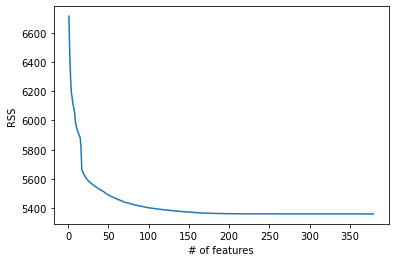

In [205]:
import matplotlib.pyplot as plt

plt.plot(np.linspace(1,379,379), FSS['RSS'])
plt.ylabel("RSS")
plt.xlabel("# of features")

In [250]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

MSE = []
Features = FSS['Features'].to_list()
for f in Features:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    model = LinearRegression()
    model.fit(X_train[f], y_train)
    yhat_test = model.predict(X_test[f])
    
    test_mse = mean_squared_error(y_test, yhat_test)
    MSE.append(test_mse)
    
FSS['# of Features'] = list(range(1,380))
FSS['Test MSE'] = MSE

In [249]:
FSS

,Features,RSS,# of Features,Test MSE
0,[release_date_int],6714.564425,1,0.738075
0,"[release_date_int, Drama]",6470.747338,2,0.715209
0,"[release_date_int, Drama, United States of Ame...",6300.430721,3,0.739020
0,"[release_date_int, Drama, United States of Ame...",6192.526798,4,0.686774
0,"[release_date_int, Drama, United States of Ame...",6157.025054,5,0.682282
...,...,...,...,...
0,"[release_date_int, Drama, United States of Ame...",5359.552289,375,1806.655168
0,"[release_date_int, Drama, United States of Ame...",5359.552289,376,2371.982968
0,"[release_date_int, Drama, United States of Ame...",5359.552289,377,127.336140
0,"[release_date_int, Drama, United States of Ame...",5359.552289,378,680.852234


In [244]:
# FSS.to_csv("data/stepwise_selection_results.csv", index=False)

In [272]:
id = FSS['Test MSE'].to_list().index(np.min(FSS['Test MSE']))

FSS.iloc[id:id+1,:]

,Features,RSS,# of Features,Test MSE
0,"[release_date_int, Drama, United States of Ame...",5512.100834,44,0.575037


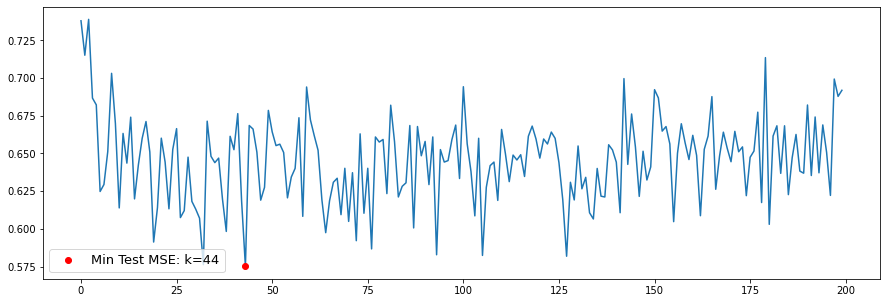

In [263]:
x = np.arange(200)
y_mse = FSS['Test MSE'].iloc[:200]
plt.figure(figsize=(15,5))
plt.plot(x,y_mse)
plt.plot(43, FSS['Test MSE'].iloc[43],'ro', label='Min Test MSE: k=44')
plt.legend(loc='lower left',fontsize=13)

In [243]:
y = df['rating_avg']
all_mdl = sm.OLS(y, X).fit()
mean_squared_error(y, all_mdl.predict())

0.6177446160279703

In [274]:
features = FSS['Features'].iloc[index]
new_df = df.loc[:,features]

In [275]:
# new_df.to_csv("data/movie_reduced_features.csv", index=False)